_ANN201. Méthode des éléments finis (2025-2026)_

<div class="alert alert-block alert-danger">

- Votre travail devra être présenté lors d'une soutenance orale en binôme (**durée complète : 14 minutes**).
  - Les deux membres du binôme doivent tout d’abord présenter les résultats pendant **une durée de 7 minutes**.
  - Lors de la séance de questions (**durée : 7 minutes**), vous devez prouver que vous maitrisez toutes les méthodes et les algorithmes que vous avez utilisés.
  
- Ce notebook Jupyter sera votre support de présentation, mais il est surtout demandé de montrer et commenter votre code et de faire une ou plusieurs démos.

- Vous avez le droit d’utiliser tous les documents et les outils informatiques que vous voulez.
  
- Vous devez compléter tous les &laquo; <strong>...</strong> &raquo;.

- **Barème** : La prise d'initiative et la créativité seront largement récompensées.
  - 6 points pour l'exercice 1, environ 2 minutes de présentation ;
  - 7 points pour l'exercice 2, environ 2 minutes de présentation ;
  - 7 points pour l'exercice 3, environ 3 minutes de présentation.

</div>

In [1]:
#### Gestion des imports ####
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp

# Importation d'utilitaires contenue dans le dossier `src` pour simplifier
# l'utilisation des maillages et de l'affichage.
import src

# Résolution numérique de l'équation de Helmholtz

On s'intéresse dans ce TP à la propagation des ondes acoustiques en régime harmonique, modélisée par l'équation de Helmholtz avec des conditions aux limites (C.L.) variées.
Ce problème présente de multiples difficultés que nous allons aborder progressivement.
Dans le premier exercice, nous verrons comment prendre en compte des coefficients variables ainsi que des C.L. de Dirichlet.
Dans le deuxième exercice, les C.L. considérées sont des conditions de Fourier.
Enfin, le dernier exercice est consacré à une application sur une géométrie plus &laquo; amusante &raquo; et mélange ces deux types de C.L.

## Exercice 1 - Équation de Helmholtz avec coefficients variables et conditions de Dirichlet

Soit $\Omega$ un ouvert borné à frontière polygonale de $\mathbb{R}^2$.
On s'intéresse au calcul de la pression de l'onde acoustique $P \equiv P(x,y)$, solution de l'équation de Helmholtz, avec condition aux limites de Dirichlet :
_Trouver $ P \in H^1(\Omega)$ telle que_
$$
    \begin{dcases}
        -\operatorname{div}(\mu \nabla P) - \rho \, \omega^2 \, P = S, & \text{dans} \ \Omega,
        \\
        P = P_\Gamma, & \text{sur} \ \partial\Omega,
    \end{dcases}
    \tag{$\mathcal{H}$}
$$
où $\rho$ est une constante et la fonction $\mu \colon \Omega \rightarrow \mathbb{R}$ est régulière par morceaux, supposée positive et vérifiant : il existe $\mu_{\min}, \mu_{\max} > 0$ telle que $\mu_{\min} \leq \mu(x, y) \leq \mu_{\max}$, pour presque tout $(x,y) \in \Omega$.
Les données sont la source $S \in L^2(\Omega)$, la pression fixée au bord $P_\Gamma \in \mathbb{R}$, supposée constante et la fréquence de l'onde $\omega$.

<span style="color:red">__Question 1.1__</span> - Si on exprime la pression $P$ sous la forme $P(x,y) = P_\Gamma + u(x,y)$, pour $(x,y)$ parcourant $\overline{\Omega}$, montrer que la nouvelle inconnue $u$ est solution du problème :
_Trouver $u \in H^1(\Omega)$ telle que_
$$
    \begin{dcases}
        - \operatorname{div}(\mu \nabla u) - \rho \, \omega^2 \, u = f, & \text{dans}\ \Omega,
        \\
        u = 0, & \text{sur} \ \partial\Omega,
    \end{dcases}
    \tag{$\mathcal{H}_0$}
$$
en précisant la valeur du second membre $f$.

<span style="color:green">__Réponse 1.1__</span> - Soit $P \in H^1(\omega)$ solution de $(H)$. On l'exprime $P = u + P_\Gamma$, où $u \in H^1(\omega)$ et $P_\Gamma$ la valeur au bord introduite dans (2).

$$
\text{div}(\mu \nabla P) = \text{div}(\mu \nabla (u+P\Gamma)) = \text{div}(\mu \nabla u)
$$

$$
\rho \omega^2 P = \rho \omega^2 u + \rho \omega^2 P_\Gamma
$$

Donc, par (1) : on a, dans $\Omega$,

$$
- \text{div}(\mu \nabla u) - \rho\omega^2 u = S + \rho \omega^2 P_\Gamma
$$

et par (2) : on a, sur $\partial \Omega$,

$$
u = 0 \quad \text{(condition aux limites)}
$$

$u \in H^1(\Omega)$ est donc solution de $(H)$ avec $f = S + \rho \omega^2 P_\Gamma$.

---

<span style="color:red">__Question 1.2__</span> - Rappeler la formule d'intégration par parties avec la divergence, et vérifier que la formulation variationnelle du problème ($\mathcal{H}_0$) s'écrit :
_Trouver $u \in V(\Omega)$ telle que_
$$
    \int_\Omega \mu \nabla u \cdot \nabla v \, \mathrm{d}\Omega - \omega^2 \int_\Omega \rho \, u \, v \, \mathrm{d}\Omega = \int_\Omega f \, v \, \mathrm{d}\Omega,
    \qquad \forall v \in V(\Omega).
    \tag{$\mathcal{V}_0$}
$$
où on précisera l'espace $V(\Omega)$.

<span style="color:green">__Réponse 1.2__</span> - On choisit $H_0^1(\Omega)$ comme espace variationnel. La condition aux limites est ainsi essentielle.

On se donne $u \in H_0^1(\Omega)$ solution de $(H_0)$ et $v \in H_0^1(\Omega)$.

On multiplie (1) par $v$ et on intègre sur $\Omega$ :

$$
- \int_{\Omega} \text{div}(\mu \nabla u)vdx 
- \int_{\Omega} \rho \omega^2 u v dx
= \int_{\Omega} f v dx
$$

On rappelle la formule d'intégration par parties avec la divergence :

$$
\int_{\Omega} \text{div}(\nabla f) \, g \, dx 
+ \int_{\Omega} \nabla f \cdot \nabla g \, dx
= \int_{\partial \Omega} (\nabla f \cdot  n)  \, g \, d\Gamma
$$

On a finalement :

$$
\int_{\Omega} \mu \nabla u \cdot \nabla v \, dx
- \int_{\Omega} \rho \omega^2 u \, v \, dx
= \int_{\Omega} f \, v \, dx
$$

D'où la formulation variationnelle :

$(V_0)$ : Trouver $u \in H_0^1(\Omega)$ telle que $\forall v \in H_0^1(\Omega), \int_{\Omega} \mu \nabla u \cdot \nabla v \, dx - \int_{\Omega} \rho \omega^2 uv \, dx = \int_{\Omega} fv \, dx $


---

**Le caractère bien posé de cette formulation n'est pas clair : voir Exercice 1 du TD3 et voir questions dans l'excercise 3 de ce TP.**
**Dans ce qui suit, nous ferons l'hypothèse que ce problème ($\mathcal{V}_0$) est bien posé.**

### Discrétisation

Soit $\mathcal{T}_h$ une triangulation du domaine $\Omega$, et $V_h$ l'approximation de $H^1(\Omega)$ par des éléments finis $P^1$ associés à la triangulation $\mathcal{T}_h$.
On note $(T_\ell)_{\ell=1,L}$ les triangles de $\mathcal{T}_h$, $(S_I)_{I=1,N}$ les sommets des triangles et $(\phi_I)_{I=1,N}$ la base de $V_h$ définie par $\phi_I(S_J) = \delta_{I,J}$, pour $1 \leq I, J \leq N$.
Pour définir une approximation interne de $H^1_0(\Omega)$, on procède de la façon suivante.
On introduit le sous-espace vectoriel engendré par les fonctions de base associées aux nœuds intérieurs :
$$
    V_h^0 = \operatorname{Vect}\left\{ \phi_I \mid S_I \not\in \partial\Omega \right\},
    \qquad \dim V_h^0 = N_0.
$$
Par construction, $V_h^0 \subset H_0^1(\Omega)$. 

<span style="color:red">__Question 1.3__</span> - Quelle est la formulation variationnelle discrète vérifiée par la solution approchée $u_h$ ?
Exprimer la pression approchée $P_h$ en fonction de $u_h$.

<span style="color:green">__Réponse 1.3__</span> - La formulation variationnelle discrète vérifiée par la solution approchée $u_h$ est :

$(V_0^h)$ : Trouver $u_h \in V_h^0$ telle que $\forall v_h \in V_h^0, \int_{\Omega} \mu \nabla u_h \cdot \nabla v_h \, dx - \int_{\Omega} \rho \omega^2 u_h v_h \, dx = \int_{\Omega} f v_h \, dx $

La pression approchée $P_h$ s'exprime ainsi : $P_h = P_\Gamma + u_h$.

---

<span style="color:red">__Question 1.4__</span> - La solution approchée $u_h$ s'écrit sous la forme
$$
    u_h(x,y)~=~ \sum_{I \ \mid \ S_I \not\in \partial\Omega} u_h(S_I) \phi_I(x,y),\qquad \forall~(x,y) \in \overline{\Omega}.
$$ 
Exprimer la formulation variationnelle discrète sous la forme d'un système linéaire équivalent :
$$
    \mathbb{A}^0(\omega) \vec{U}^0 = \vec{L}^0, \tag{$\mathcal{D}^0$}
$$
où la $I^{\text{ème}}$ composante du vecteur $\vec{U}^0 \in \mathbb{R}^{N_0}$ vaut $u_h(S_I)$ et où on écrira $\mathbb{A}^0(\omega) = \mathbb{K}^0_\mu - \rho \, \omega^2 \, \mathbb{M}^0$, avec $\mathbb{M}^0$ la matrice de masse, et $\mathbb{K}^0_\mu$ la matrice de rigidité.
Quelles sont les propriétés fondamentales des matrices $\mathbb{M}^0$ et $\mathbb{K}^0_\mu$ ?

<span style="color:green">__Réponse 1.4__</span> - On introduit $\vec{L}^0 \in \mathbb{R}^{N_0}$ tel que $\forall i \in \{1,2,...,N_0\}$, $[\vec{L}^0]_i = \int_{\Omega} f \Phi_i \, dx$.

On introduit également $\mathbb{A}^0(\omega) = \mathbb{K}_\mu^0 - \rho \omega^2 \mathbb{M}^0 \in \mathcal{M}_{N_0}(\mathbb{R})$

Avec $\mathbb{K}_\mu^0 \in \mathcal{M}_{N_0}(\mathbb{R})$ tel que $\forall i,j \in \{1,2,...,N_0\} ,[\mathbb{K}_\mu^0]_{i,j} = \int_{\Omega} \mu \nabla \Phi_i \cdot \nabla \Phi_j \, dx$.

Et $\mathbb{M}^0 \in \mathcal{M}_{N_0}(\mathbb{R})$ tel que tel que $\forall i,j \in \{1,2,...,N_0\} ,[\mathbb{M}^0]_{i,j} = \int_{\Omega} \Phi_i \Phi_j \, dx$

Enfin, on a les équivalences suivantes :

##### **$$\left( \text{Trouver } u_h \in V_h^0 \text{ tel que } \forall v \in V_h^0, \int_{\Omega} \mu \nabla u \cdot \nabla v \, dx - \int_{\Omega} \rho \omega^2 uv \, dx = \int_{\Omega} fv \, dx \right)$$**

##### $$\Leftrightarrow$$

##### **$$\left( \text{Trouver } u_h \in V_h^0 \text{ tel que } \forall i \in \{1,2,...,N_0\}, \int_{\Omega} \mu \nabla u_h \cdot \nabla \Phi_i \, dx - \int_{\Omega} \rho \omega^2 u \Phi_i \, dx = \int_{\Omega} f \Phi_i \, dx \right)$$**

##### $$\Leftrightarrow$$

##### **$$\left( \text{Trouver } (u_1,...,u_{N_0}) \in \mathbb{R}^{N_0} \text{ tel que } \forall i,j \in \{1,2,...,N_0\}, \int_{\Omega} \mu u_j \nabla \Phi_j \cdot \nabla \Phi_i \, dx - \int_{\Omega} \rho \omega^2 u_j \Phi_j \Phi_i \, dx = \int_{\Omega} f \Phi_i \, dx \right)$$**

##### $$\Leftrightarrow$$

##### **$$\left( \text{Trouver } \vec{U}^0 = (u_1,...,u_{N_0}) \in \mathbb{R}^{N_0} \text{ tel que } \mathbb{A}^0(\omega) \vec{U}^0 = \vec{L}^0 \right)$$**

**NB :** Les matrices $\mathbb{K}_\mu^0$ et $\mathbb{M}^0 \in \mathcal{M}_{N_0}(\mathbb{R})$ sont symétriques et définies positives. Elles sont creuses également.

---

<span style="color:red">__Question 1.5__</span> - Dans la pratique, plutôt que de résoudre le système linéaire ($\mathcal{D}^0$), on préfère résoudre
$$
    \mathbb{A}'(\omega) \vec{U}' = \vec{L}', \tag{$\mathcal{D}'$}
$$
obtenu à l'aide de la technique de ***pseudo-élimination***.
Nous noterons dans la suite $\mathbb{A}(\omega) = \mathbb{K}_\mu - \rho \, \omega^2 \, \mathbb{M} \in \mathcal{M}_N(\mathbb{R})$ et $\vec{L} \in \mathbb{R}^N$ les matrices et vecteurs construits avec ***toutes les fonctions de base*** (comme on fait dans le TP1).
1. Notons $\vec{V} \in \mathbb{R}^N$ la solution du système $\mathbb{A}(\omega) \vec{V} = \vec{L}$.
   Donner le problème aux limites dont $\vec{V} $ approche la solution.
2. Rappeler comment sont obtenus $\mathbb{A}'(\omega) \in \mathcal{M}_N(\mathbb{R})$ et $\vec{L}' \in \mathbb{R}^N$ à partir des matrices $\mathbb{A} (\omega) \in \mathcal{M}_N(\mathbb{R})$ et $\vec{L} \in \mathbb{R}^N$.
  On donnera les expressions de $\mathbb{A}'(\omega) \in \mathcal{M}_N(\mathbb{R})$, $\vec{U}' \in \mathbb{R}^N$ et $\vec{L}' \in \mathbb{R}^N$ en fonction de $\mathbb{A}^0 \in \mathcal{M}_{N_0}(\mathbb{R})$, $\vec{U}^0 \in \mathbb{R}^{N_0}$ et $\vec{L}^0 \in \mathbb{R}^{N_0}$.
  On pourra se placer dans le cas simplifié où les nœuds intérieurs sont numérotés de $1$ à $N_0$ et les nœuds de la frontière de $N_0+1$ à $N$.

<span style="color:green">__Réponse 1.5__</span> - On note $\mathbb{A}(\omega) = \mathbb{K}_\mu - \rho \omega^2 \mathbb{M} \in \mathcal{M}_{N}(\mathbb{R})$ et $\vec{L} \in \mathbb{R}^N$ les matrices et vecteurs construits avec toutes les fonctions de base (comme au TP 1) et non seulement ceux associés aux noeuds intérieurs comme c'est le cas dans ($\mathcal{D}^0$).

1. Soit $\vec{V} \in \mathbb{R}^N$ solution du système $\mathbb{A}(\omega) \vec{V} = \vec{L}$.

$\vec{V}$ est solution du problème aux limites avec la condition aux limites : les composantes de $\vec{V}$ sur les fonctions de base de la frontière doivent être nulles.

2. La méthode de pseudo-élimination consiste à construire les matrices avec toutes les fonctions de base ($\mathbb{A}^0(\omega)$ et $\vec{L}^0$) puis on les modifie de sorte que la solution du système soit $\vec{U}^0$.

    **NB** : Pour simplifier les notations et les représentations matricielles, on réarrange notre base de sorte que les noeuds intérieurs soient numérotés de $1$ à $N_0$ et les noeuds de la frontière de $1+N_0$ à $N$.

    Par pseudo-élimination, $\mathbb{A}(\omega) = \begin{bmatrix} \mathbb{A}^0 & \mathbb{A}_{IB} \\ \mathbb{A}_{BI} & \mathbb{A}_{BB} \end{bmatrix}$ devient $\mathbb{A}'(\omega) = \begin{bmatrix} \mathbb{A}^0 & 0 \\ 0 & I_{N-N_0} \end{bmatrix}$ et $\vec{L}' = \begin{bmatrix} \vec{L}^0 \\ \vec{L}_B \end{bmatrix}$ devient $\vec{L} = \begin{bmatrix} \vec{L}^0 \\ \vec{0} \end{bmatrix}$ de sorte que $\mathbb{A}'(\omega) \vec{U}' = \vec{L}'$ donne ce qui est attendu.


---

Avant d'effectuer la pseudo-élimination, nous allons donc calculer les matrices élémentaires et assembler les matrices $\mathbb{A}'$ et $\vec{L}'$.

### Géométrie et maillages 

On veut résoudre le problème dans un ouvert $\Omega$ composé de deux zones $\Omega_1$ et $\Omega_2$.
On appelle $\mu_1 = \mu\vert_{\Omega_1}$ et $\mu_2 = \mu\vert_{\Omega_2}$ les restrictions de $\mu$ à chacun des sous-domaines.
C'est lors du calcul des matrices élémentaires qu'il faudra distinguer si un triangle est dans le domaine $\Omega_1$ (dans ce cas, on prendra $\mu=\mu_1$) ou dans le domaine $\Omega_2$ (dans ce cas, on prendra $\mu=\mu_2$).

### Calcul des matrices élémentaires par passage à l'élément fini de référence

On se place sur un triangle $T_\ell$.
Pour calculer les matrices élémentaires associées à ce triangle, nous allons utiliser une méthode de calcul, plus générale que les coordonnées barycentriques.
Pour calculer les intégrales volumiques sur le triangle $T_\ell$ (composé des points $S_1$, $S_2$ et $S_3$), on se ramène tout d'abord au triangle de référence $\widehat{T}$ (composé des points $\widehat{S}_1=(0,0)$, $\widehat{S}_2=(1,0)$ et $\widehat{S}_3=(0,1)$).

<span style="color:red">__Question 1.6__</span> - Calculer la transformation $\mathcal{F}_\ell \colon \mathbb{R}^2 \to \mathbb{R}^2$, donnée par l'expression $\widehat{S} \mapsto \mathcal{B}_\ell \widehat{S} + b_\ell$ où $\mathcal{B}_\ell \in \mathcal{M}_2(\mathbb{R})$ et $b_\ell \in \mathbb{R}^2$ qui permet de passer du triangle de référence $\widehat{T}$ au triangle $T_\ell$.
La transformation affine $\mathcal{F}_\ell$ est entièrement définie par :
$$
	\forall i \in \{1,2,3\}, \qquad \mathcal{F}_\ell\left(\widehat{S}_i\right) = S_i.
$$

<span style="color:green">__Réponse 1.6__</span> - On note $S_i = \begin{bmatrix} x_i \\ y_i \end{bmatrix}$ pour $i \in \{1,2,3\}$.

Pour $i \in \{1,2,3\}, \left( \mathcal{F}_\ell\left(\widehat{S}_i\right) = S_i \, \right) \Leftrightarrow \left( \, \mathcal{B}_\ell \widehat{S}_i + b_\ell = S_i \, \right) \Leftrightarrow \left( \, \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} \widehat{x}_i \\ \widehat{y}_i \end{bmatrix} + \begin{bmatrix} e \\ f \end{bmatrix} = \begin{bmatrix} x_i \\ y_i \end{bmatrix} \, \right)$

$\Leftrightarrow \begin{dcases} a \, \widehat{x}_i + b \, \widehat{y}_i + e = x_i \\ c \, \widehat{x}_i + d \, \widehat{y}_i + f = y_i \end{dcases}$ 

Donc, $a,b,c,d,e,f$ que l'on cherche vérifient $\begin{dcases} e = x_1 \\ f = y_1 \end{dcases}$ et $\begin{dcases} a + e = x_2 \\ c + f = y_2 \end{dcases}$ et $\begin{dcases} b + e = x_3 \\ d + f = y_3 \end{dcases}$. 

On en déduit que $a = x_2 - x_1$, $b = x_3 - x_1$, $c = y_2 - y_1$, $d = y_3 - y_1$, $e = x_1$ et $e = y_1$.

C'est-à-dire $\mathcal{B}_\ell = \begin{bmatrix} x_2 - x_1 &  x_3 - x_1 \\ y_2 - y_1 & y_3 - y_1 \end{bmatrix}$ et $b_\ell = \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}$ où, on le rappelle, les $x_i$ et les $y_i$ sont les coordonnées des sommets du triangle $T_\ell$.

---

Les intégrales de masse sur $T_\ell$ peuvent alors s'écrire
$$
	\int_{T_\ell} \phi_I(S) \, \phi_J(S) \, \mathrm{d}\Omega = \int_{\widehat{T}} \widehat{\phi}_I(\widehat{S}) \, \widehat{\phi}_J(\widehat{S}) \, |\operatorname{det} \mathcal{B}_\ell | \, \mathrm{d}\widehat{\Omega}
$$
et de rigidité
$$
	\int_{T_\ell} \mu(S) \, \nabla \phi_I(S) \cdot \nabla \phi_J(S) \, \mathrm{d}\Omega =
	\int_{\hat{T}} \mu\left( \mathcal{F}_\ell(\widehat{S}) \right)
	\left[ \left(\mathcal{B}_\ell^T\right)^{-1} \nabla \widehat{\phi}_I(\widehat{S}) \right]
	\cdot
	\left[ \left(\mathcal{B}_\ell^T\right)^{-1} \nabla \widehat{\phi}_J(\widehat{S}) \right]
	\, \left\lvert \operatorname{det}\mathcal{B}_\ell \right\rvert \, \mathrm{d}\widehat{\Omega}.
$$

<span style="color:red">__Question 1.7__</span> - Rappeler les expressions de $\widehat{\phi}_1$, $\widehat{\phi}_2$ et $\widehat{\phi}_3$.
En déduire le calcul de la matrice de masse élémentaire.

<span style="color:green">__Réponse 1.7__</span> - Fonctions de base sur $\widehat{T}$ et matrice de masse élémentaire

Les fonctions de base affines nodales sur le triangle de référence $\widehat{T}$ (éléments $\mathbb{P_1}$) sont :

$$
\widehat{\phi_1}(\xi,\eta)=1-\xi-\eta, \qquad \widehat\phi_2(\xi,\eta)=\xi,\qquad\widehat\phi_3(\xi,\eta)=\eta,
$$
avec $(\xi,\eta)\in\widehat T$.

Les intégrales de masse élémentaires s'écrivent (passage à l'élément de référence)
$$
\int_{T_\ell}\phi_i\phi_j,\mathrm d\Omega= \big|\det\mathcal B_\ell\big|\int_{\widehat T}\widehat\phi_i(\widehat S),\widehat\phi_j(\widehat S),\mathrm d\widehat\Omega.
$$

Les intégrales sur $\widehat{T}$ se calculent explicitement :
$$
\int_{\widehat T}\widehat\phi_i\widehat\phi_i,\mathrm d\widehat\Omega=\frac{1}{12},\qquad\int_{\widehat T}\widehat\phi_i\widehat\phi_j,\mathrm d\widehat\Omega=\frac{1}{24}\quad (i\ne j).
$$

Donc la matrice de masse locale (élémentaire) $M_{elem}\in\mathbb R^{3\times3}$ s'écrit

$$
M_{elem} = \big|\det\mathcal B_\ell\big|\begin{pmatrix}\frac{1}{12} & \frac{1}{24} & \frac{1}{24} \\ \frac{1}{24} & \frac{1}{12} & \frac{1}{24} \\ \frac{1}{24} & \frac{1}{24} & \frac{1}{12}\end{pmatrix}.
$$

On peut aussi l'exprimer en fonction de l'aire $|T_\ell|=\tfrac12|\det\mathcal B_\ell|$ sous la forme classique
$$
M_{elem}=\frac{|T_\ell|}{12}\begin{pmatrix}2 & 1 & 1 \\ 1 & 2 & 1 \\ 1 & 1 & 2\end{pmatrix},
$$

---

Quand les coefficients sont variables, il n'est pas toujours possible de calculer ces intégrales exactement.
On les approche alors à l'aide de formules de quadratures dites à $N_q$ points :
pour $G$ une fonction continue par morceaux de $T_\ell$
$$
    \int_{\widehat{T}} G \, \mathrm{d}\Omega \simeq \sum_{q=1}^{N_q} \zeta_q \, G(\widehat{S}_q).
$$
où $\widehat{S}_q$ sont des points de quadrature dans $\widehat{T}$ et $\zeta_q$ les poids positifs associés aux points de quadrature.
Il existe de nombreux points de quadrature (Gauss-Legendre, Gauss-Lobatto, ...) qui fournissent des approximations des intégrales.
Ces méthodes se différencient par le fait qu'elles intègrent exactement les polynômes d'un ordre donné, ce qui caractérise leur précision.
On utilisera ici la formule de quadrature à 3 points de Gauss Legendre qui est d'ordre 2 et qui est définie sur le triangle de référence $\widehat{T}$ par
$$
    \begin{array}{c|c|c|c}
	    \widehat{S}_q & (s_0,s_0) & (s_1,s_0) & (s_0,s_1)
		\\
	    \zeta_q & \zeta_0 & \zeta_0 & \zeta_0
	\end{array}
	\qquad \text{avec} \quad
	s_0 = \frac{1}{6},
		\quad
		s_1 = \frac{2}{3} 
		\quad \text{et} \quad
		\zeta_0 = \frac{1}{6}.
$$

In [2]:
QUAD_P2_NODES = np.array( # points de Gauss d'ordre 2 pour un triangle
    [[1 / 6, 1 / 6], [2 / 3, 1 / 6], [1 / 6, 2 / 3]], dtype=np.float64 
) 
QUAD_P2_WEIGHT = 1/6 # poids des points de Gauss d'ordre 2 pour un triangle

<span style="color:red">__Question 1.8__</span> - À l'aide de ces éléments, modifier le calcul des matrices de rigidité élémentaires.
Il faudra modifier la fonction `elem_mat_K_fct` et `elem_mat_M`, en prenant comme argument supplémentaire une fonction.

In [3]:
def elem_mat_K_fct(S1, S2, S3, fct, tol=1e-8):
    """Calcule la matrice de rigidité elementaire en P1 lagrange avec un coefficient variable.

    NOTE (1) le calcul est exacte (pas de condensation de masse)
         (2) calcul direct a partir des formules donnees par les coordonnees barycentriques

    Parameters
    ----------
    S1, S2, S3 : les 2 coordonnees des 3 sommets du triangle (vecteurs reels 1x2)
    fct : la fonction `fct` prend comme argument les noeuds du maillage (tableau de taille `(nb_nodes, 2)`)
          et renvoie un vecteur de taille `nb_nodes` qui contient les valeurs de `fct` en chaque noeud. Un
          exemple de fonction `fct` est donné ci-dessous :
      ```def f(nodes):
            x, y = nodes[:, 0], nodes[:, 1]
            return np.cos(x) * np.exp(y)
      ```

    Returns
    -------
    matrice de rigidité elementaire (matrice 3x3)
    """

    # coordonnées des sommets du triangle étudié
    x1, y1 = S1
    x2, y2 = S2
    x3, y3 = S3

    Bl = np.array([[x2-x1, x3-x1], [y2-y1, y3-y1]]) # matrice de passage du triangle de ref au triangle étudié
    jac = abs(np.linalg.det(Bl))                    # jacobien (déterminant) = 2*aire du triangle

    if jac <= tol:
        raise ValueError("l'aire d'un triangle est nulle !!!")
    
    # on inverse Bl 
    invBl = np.linalg.inv(Bl)  

    # gradients des fonctions de base sur le triangle de référence
    grad_phi_hat = np.array([[-1, -1], [1, 0], [0, 1]])  

    grad_phi_phys = grad_phi_hat @ invBl  

    K_elem = np.zeros((3, 3), dtype=np.float64)

    # fonctions de base P1 sur triangle de référence
    def phi_hat(S_hat):
        x, y = S_hat
        return np.array([1 - x - y, x, y])

    for k in range(3):
        phi_vals = phi_hat(QUAD_P2_NODES[k])     # valeurs des fonctions de base au point de Gauss
        phi1, phi2, phi3 = phi_vals
        S = phi1 * S1 + phi2 * S2 + phi3 * S3    # calcul des coordonnees physiques du point de Gauss

        mu = float(np.squeeze(fct(S.reshape(1, 2)))) # on évalue la fonction fct au point de Gauss (reshape pour avoir un tableau 2D et squeeze pour avoir un scalaire) 

        for i in range(3): 
            for j in range(3):
                # produit scalaire des gradients physiques (vecteurs lignes -> utiliser np.dot)
                prod_scalaire = np.dot(grad_phi_phys[i], grad_phi_phys[j])
                K_elem[i, j] += jac * mu * prod_scalaire * QUAD_P2_WEIGHT

    return K_elem

In [4]:
def elem_mat_M(S1, S2, S3, tol=1e-8):
    """Calcule la matrice de masse elementaire en P1 lagrange.

    NOTE (1) le calcul est exacte (pas de condensation de masse)
         (2) calcul direct a partir des formules donnees par les coordonnees barycentriques

    Parameters
    ----------
    S1, S2, S3 : les 2 coordonnees des 3 sommets du triangle (vecteurs reels 1x2)

    Returns
    -------
    matrice de masse elementaire (matrice 3x3)
    """

    # coordonnées des sommets du triangle étudié
    x1, y1 = S1
    x2, y2 = S2
    x3, y3 = S3 

    Bl = np.array([[x2 - x1, x3 - x1], [y2 - y1, y3 - y1]])
    jac = abs(np.linalg.det(Bl))

    if jac <= tol:
        raise ValueError("L'aire d'un triangle est nulle !!!")

    # fonctions de base P1 sur le triangle de référence 
    def phi_hat(S_hat):
        x, y = S_hat
        return np.array([1 - x - y, x, y])

    # initialisation de la matrice de masse élémentaire
    M_elem = np.zeros((3, 3), dtype=float)

    for k in range(3):

        # on récupère les coordonnées du point de quadrature sur le triangle de ref
        phi_hats = phi_hat(QUAD_P2_NODES[k])

        S = phi_hats[0] * S1 + phi_hats[1] * S2 + phi_hats[2] * S3 # point de quadrature dans le triangle étudié

        # ajout de la contribution au point de quadrature : phi_i * phi_j
        M_elem += np.outer(phi_hats, phi_hats)*QUAD_P2_WEIGHT # on utilise outer pour faire le produit tensoriel car phi_hats est un vecteur et on veut une matrice, pas un scalaire

    M_elem *= jac # mutliplication par le jacobien 
    
    return M_elem
    
    

<span style="color:red">__Question 1.9__</span> - Valider le calcul pour un triangle quelconque dans le cas $\rho = \mu = 1$ en comparant au calcul de la matrice élémentaire du TP précédent.

In [5]:
S1 = np.array([0., 0.])
S2 = np.array([1.0, 0.])
S3 = np.array([0., 1.])

def elem_mat_K_tp1(S1, S2, S3):
    x1, y1 = S1
    x2, y2 = S2
    x3, y3 = S3
   
    aire = 0.5 * abs((x2-x1)*(y3-y1) - (x3-x1)*(y2-y1))
   
    b1, b2, b3 = y2-y3, y3-y1, y1-y2
    c1, c2, c3 = x3-x2, x1-x3, x2-x1
   
    normal = np.array([[b1, b2, b3], [c1, c2, c3]])
   
    return (1 / (4 * aire)) * normal.T @ normal

def elem_mat_M_tp1(S1, S2, S3):
    x1, y1 = S1
    x2, y2 = S2
    x3, y3 = S3
   
    aire = 0.5 * abs((x2-x1)*(y3-y1) - (x3-x1)*(y2-y1))
   
    return (aire / 12) * np.array([[2, 1, 1],
                                  [1, 2, 1],
                                  [1, 1, 2]])

print("MATRICES DE RÉFÉRENCE (TP1)")
K_ref = elem_mat_K_tp1(S1, S2, S3)
M_ref = elem_mat_M_tp1(S1, S2, S3)
print("Matrice K :\n", K_ref)
print("\nMatrice M :\n", M_ref)

mu_1 = lambda nodes: 1.0

K_new = elem_mat_K_fct(S1, S2, S3, mu_1)
M_new = elem_mat_M(S1, S2, S3)

print("\n\nNOUVELLES MATRICES (TP2)")
print("Matrice K :\n", K_new)
print("\nMatrice M :\n", M_new)

MATRICES DE RÉFÉRENCE (TP1)
Matrice K :
 [[ 1.  -0.5 -0.5]
 [-0.5  0.5  0. ]
 [-0.5  0.   0.5]]

Matrice M :
 [[0.08333333 0.04166667 0.04166667]
 [0.04166667 0.08333333 0.04166667]
 [0.04166667 0.04166667 0.08333333]]


NOUVELLES MATRICES (TP2)
Matrice K :
 [[ 1.  -0.5 -0.5]
 [-0.5  0.5  0. ]
 [-0.5  0.   0.5]]

Matrice M :
 [[0.08333333 0.04166667 0.04166667]
 [0.04166667 0.08333333 0.04166667]
 [0.04166667 0.04166667 0.08333333]]


### Assemblage des matrices et vecteur second membre

On souhaite résoudre le problème ($\mathcal{D}'$), ce qui permet de calculer la pression approchée $P_h$. 

<span style="color:red">__Question 1.10__</span> - Reprendre la partie assemblage du TP précédent, compléter les fonctions `mat_KM` et `vec_L`, permettant de construire les matrices $\mathbb{K}_{\mu}$ et $\mathbb{M}$ et le vecteur $\vec{L}$, __avant la pseudo-élimination__.
Comme au TP précédent, pour une donnée $f\in \mathcal{C}^0(\overline{\Omega})$, le vecteur $\vec{L}$ sera construit à l'aide d'une technique d'interpolation.

In [6]:
def mat_KM(mesh, domain_to_mu_fct):
    """Calcule les matrices de rigidité et de masse en P1 lagrange.

    Parameters
    ----------
    mesh : Mesh
        le maillage
    domain_to_mu : dict[str, function]
        dictionnaire associant a chaque domaine la fonction mu

    Returns
    -------
    K la matrice de rigidité (matrice sparse de taille nb_nodes x nb_nodes)
    M la matrice de masse (matrice sparse de taille nb_nodes x nb_nodes)
    """
    K = sp.dok_array((mesh.nb_nodes, mesh.nb_nodes), dtype=np.float64) # initialisation matrice de rigidité creuse
    M = sp.dok_array((mesh.nb_nodes, mesh.nb_nodes), dtype=np.float64) # initialisation matrice de masse creuse

    for domain, mu_fct in domain_to_mu_fct.items():   # parcours des domaines du maillage
        triangles = mesh.domains[domain]["triangle"]  # indices des sommets des triangles du domaine # tableau de taille (nb_triangles, 3)

        for k in range(mesh.nb_elements(domain, "triangle")):   # nb_triangles = mesh.nb_elements(domain, "triangle")
            triangle = triangles[k, :]                          # indices des sommets, vecteur de taille 3
            
            # on récupère les coordonnées des sommets du triangle à partir de leurs indices
            S1 = mesh.nodes[triangle[0], :]
            S2 = mesh.nodes[triangle[1], :]
            S3 = mesh.nodes[triangle[2], :]

            # calcul des matrices élémentaires du triangle
            K_elem = elem_mat_K_fct(S1, S2, S3, mu_fct)
            M_elem = elem_mat_M(S1, S2, S3) 

            # assemmblage de la matrice globale et du second membre
            for i in range(3):
                I = triangle[i]                # on remonte à l'indice global du noeud (dans le maillage)
                for j in range(3):  
                    J = triangle[j]            # on remonte à l'indice global du noeud (dans le maillage)
                    K[I, J] += K_elem[i, j]    # assemblage de la matrice de rigidité
                    M[I, J] += M_elem[i, j]    # assemblage de la matrice de masse

    return (K.tocsc(), M.tocsc())

In [7]:
def vec_L(fct, mass_matrix, nodes):
    """Calcule le second membre L.

    Parameters
    ----------
    fct : la fonction `fct` prend comme argument les noeuds du maillage (tableau de taille `(nb_nodes, 2)`)
          et renvoie un vecteur de taille `nb_nodes` qui contient les valeurs de `fct` en chaque noeud. Un
          exemple de fonction `fct` est donné ci-dessous :
      ```def f(nodes):
            x, y = nodes[:, 0], nodes[:, 1]
            return np.cos(x) * np.exp(y)
      ```

    mass_matrix : matrice de masse (matrice sparse de taille nb_nodes x nb_nodes)

    nodes : les coordonnées des noeuds du maillage (matrice de taille nb_nodes x 2)

    Returns
    -------
    vecteur L (vecteur de taille nb_nodes x 1)
    """
    # approche par interpolation P1 lagrange des valeurs de fct aux noeuds du maillage
    L = mass_matrix @ fct(nodes) # on multiplie la matrice de masse par les valeurs de fct en chaque noeud
    
    return np.asarray(L).reshape(-1)   # on reshape pour obtenir un vecteur 1D (nb_nodes,)

<span style="color:red">__Question 1.11__</span> - Écrire la fonction dont la syntaxe est `elimine` qui réalise la __pseudo-élimination__ des nœuds sur la frontière.

In [8]:
def elimine(A, L, mesh, boundary_name):
    A_prime = A.todok() # copie de la matrice A (utilisation de dok pour faciliter l'accès aux éléments)
    L_prime = L.copy()  # copie du vecteur L

    idx = mesh.domain_node_indices(boundary_name, "line") # indices des noeuds sur la frontière

    for I in idx: # parcours des indices des noeuds à annuler
        for J in range(A_prime.shape[0]):
            A_prime[I, J] = 0  # annulation de la ligne I
            A_prime[J, I] = 0  # annulation de la colonne I
        A_prime[I, I] = 1      # mise à 1 de la diagonale 
        L_prime[I] = 0         # mise à 0 du second membre

    return A_prime.tocsc(), L_prime

### Validation du code

On veut vérifier que le code calcule une solution approchée $u_h$ correcte.
Pour cela, on résout le problème ($\mathcal{H}_0$) dans un carré $\Omega=]0,1[^2$ avec les paramètres $\rho=1$, $\mu=1$, $\omega = 4$ et une solution $u$ égale à $u_{\mathrm{ex}}(x,y)=\sin(3\pi x)\,\sin(4\pi y)$, pour $(x,y)\in\overline{\Omega}$.

<span style="color:red">__Question 1.12__</span> - Calculer la donnée $f$ correspondante.

<span style="color:green">__Réponse 1.12__</span> - On considère le domaine $\Omega = ]0,1[^2$ avec les paramètres $\rho = 1$, $\mu = 1$, $\omega = 4$ et la solution exacte
$u_{\mathrm{ex}}(x,y) = \sin(3\pi x)\,\sin(4\pi y)$ pour $(x,y)\in \overline{\Omega}$.

Le problème $(\mathcal{H}_0)$ à résoudre est $\operatorname{div}(\mu \nabla u) - \rho\, \omega^2 u = f \text{ dans } \Omega \text{ avec } \mu = \rho = 1 \text{, donc } \Delta u - \omega^2 u = f$.

- **Calcul du Laplacien de $u_{\mathrm{ex}}$**

$\frac{\partial^2}{\partial x^2} \sin(3\pi x) = - (3\pi)^2 \sin(3\pi x)$
$\frac{\partial^2}{\partial y^2} \sin(4\pi y) = - (4\pi)^2 \sin(4\pi y)$

$$
\begin{align*} 
\text{On a donc : } \Delta u_{\mathrm{ex}}(x, y) 
&= \frac{\partial^2 u_{\mathrm{ex}}}{\partial x^2} + \frac{\partial^2 u_{\mathrm{ex}}}{\partial y^2} \\
&= \frac{\partial^2 u_{\mathrm{ex}}}{\partial x^2} + \frac{\partial^2 u_{\mathrm{ex}}}{\partial y^2} \\
&= \frac{\partial^2 u_{\mathrm{ex}}}{\partial x^2} + \frac{\partial^2 u_{\mathrm{ex}}}{\partial y^2} \\
&= \sin(4\pi y) \cdot \frac{\partial^2}{\partial x^2} \sin(3\pi x) + \sin(3\pi x) \cdot \frac{\partial^2}{\partial y^2} \sin(4\pi y) \\
&= - (3\pi)^2 \sin(3\pi x)\sin(4\pi y) - (4\pi)^2 \sin(3\pi x)\sin(4\pi y) \\
&= - \left[ (3\pi)^2 + (4\pi)^2 \right] \, \sin(3\pi x)\sin(4\pi y)
\end{align*}
$$

- **Expression de $f$ :**

En reportant dans l’équation,
$$
\begin{align*}
f(x, y) &= -\Delta u_{\mathrm{ex}}(x, y) - \omega^2 u_{\mathrm{ex}}(x, y) \\
&= \left( (3\pi)^2 + (4\pi)^2 - 4^2 \right) \sin(3\pi x)\sin(4\pi y) \\
&= \left( 9\pi^2 + 16\pi^2 - 16 \right) \sin(3\pi x)\sin(4\pi y) \\
&= \left( 25\pi^2 - 16 \right) \sin(3\pi x)\sin(4\pi y)
\end{align*}
$$

- **Conclusion**

La donnée $f$ à utiliser pour tester le code avec cette solution exacte est :
$$
\boxed{
f(x, y) = \left(25\pi^2 - 16\right) \sin(3\pi x)\sin(4\pi y)
}
$$

où $\pi^2 \approx 9.8696$, donc $25\pi^2 - 16 \approx 231.739$.

---

<span style="color:red">__Question 1.13__</span> - En utilisant le maillage généré par la fonction `src.rectangle`, comparé la solution exacte $u_{\mathrm{ex}}$, la solution sans pseudo-élimination $u_h$ et la solution avec pseudo-élimination $u_h'$.

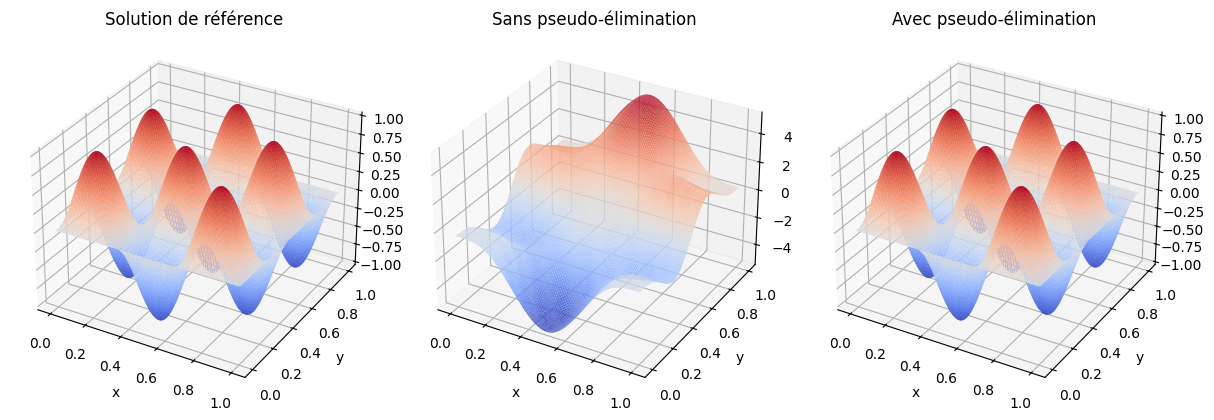

In [9]:
omega = 4.0

def u_exact(nodes): # solution exacte
    x, y = nodes[:, 0], nodes[:, 1] # on extrait les coordonnées x et y
    return np.sin(3*np.pi*x)*np.sin(4*np.pi*y)

def f(nodes, omega): # 
    x, y = nodes[:, 0], nodes[:, 1]
    coeff = 25*np.pi**2 - omega**2
    return coeff*np.sin(3*np.pi*x)*np.sin(4*np.pi*y)

# on génère le maillage du carré unité [0,1]x[0,1] avec une taille de maille 0.01
mesh = src.rectangle((0, 0), (1, 1), 0.01)

fig, axs = plt.subplots(
    ncols=3,
    figsize=(12, 4),
    layout="constrained",
    subplot_kw={"projection": "3d", "aspect": "auto", "xlabel": "x", "ylabel": "y"},
)

axs[0].set_title("Solution de référence")
src.plot3d_fct_trimesh(
    axs[0],
    u_exact(mesh.nodes),
    mesh,
    trisurf_kwargs={"cmap": "coolwarm"},
    show_colorbar=False,
)

K, M = mat_KM(mesh, {"Omega": lambda _: 1.0})
A = K - omega**2 * M
L = vec_L(lambda nodes: f(nodes, omega), M, mesh.nodes)

axs[1].set_title("Sans pseudo-élimination")
src.plot3d_fct_trimesh(
    axs[1],
    sp.linalg.spsolve(A, L),
    mesh,
    trisurf_kwargs={"cmap": "coolwarm"},
    show_colorbar=False,
)

A_prime, L_prime = elimine(A, L, mesh, "Gamma") # pseudo-élimination

axs[2].set_title("Avec pseudo-élimination")
src.plot3d_fct_trimesh(
    axs[2],
    sp.linalg.spsolve(A_prime, L_prime),
    mesh,
    trisurf_kwargs={"cmap": "coolwarm"},
    show_colorbar=False,
)

plt.show()

<span style="color:red">__Question 1.14__</span> - __Convergence $L^2$.__
En assimilant $u$ à son interpolée $\pi_h u$, donner une estimation de la norme $L^2$ de l'erreur relative $\lVert u-u_h \rVert_{L^2(\Omega)} / \lVert u\rVert_{L^2(\Omega)}$, faisant intervenir la matrice de masse $\mathbb{M}'$.
Comment évolue cette erreur en fonction de $h$ ?
On tracera le $\log$ cette erreur en fonction du $\log(1/h) $ pour les valeurs de $\omega$ suivantes : $\omega=1$, $\omega=4$, $\omega=4.44$.
Vous pourrez également la tracer pour des valeurs de $\omega$ autour des pics observés dans la question précédente.
Comment interprétez-vous vos résultats ?

<span style="color:green">__Réponse 1.14__</span> - **Estimation de l’erreur relative $L^2$**

On note $u$ la solution exacte, $u_h$ la solution approchée, et $\pi_h u$ l’interpolée de $u$ sur le maillage.  
La norme $L^2$ de l’erreur relative est : $\frac{\lVert u - u_h \rVert_{L^2(\Omega)}}{\lVert u \rVert_{L^2(\Omega)}}$

Comme dans le cours, on assimile $u$ à son interpolée $\pi_h u$, c’est-à-dire que l’on calcule $u$ aux nœuds du maillage, et on considère le vecteur nodal $U_{\text{ex}}$ dont la $i$-ème composante est $u(S_i)$.

La norme $L^2$ sur le maillage s’écrit alors, en utilisant la matrice de masse pseudo-éliminée $\mathbb{M}'$ : 
$$\lVert v \rVert_{L^2(\Omega)}^2 \approx V^T \mathbb{M}' V $$
où $V$ est le vecteur nodal associé à la fonction $v$.

L’erreur relative $L^2$ s’estime donc numériquement par :
$$ \text{erreur relative} =
\frac{\sqrt{(U_{\text{ex}} - U_h)^T \mathbb{M}' (U_{\text{ex}} - U_h)}}{\sqrt{U_{\text{ex}}^T \mathbb{M}' U_{\text{ex}}}}
$$

- **Comportement de l’erreur**

D'après le cours, $\lVert u - u_h \rVert_{L^2(\Omega)}$ est en $\mathcal{O}(h^2)$ où $h$ est le pas du maillage (taille maximale des triangles).

Donc, l’erreur $L^2$ décroit en $\mathcal{O}(h^2)$ lorsque $h \to 0$.

-  **Tracé**

Comme dans le cours, on va tracer le $\log$ de l’erreur relative $L^2$ et ici on va le faire en fonction de $-\log(h)=\log(1/h)$ pour plusieurs valeurs de $\omega = 1$, $4$, $4.44$ :

Le tracé $\log$-$\log$ permet de visualiser clairement la pente (taux de convergence) et de repérer les anomalies dues à la physique du problème ou à la discrétisation.

Pour $\omega$ modéré, la courbe devrait être linéaire de pente $\approx -2$ (car $\log(\text{erreur}) \sim 2\log(h) = -2\log(1/h)$), ce qui confirme la convergence d’ordre 2 attendue pour le schéma P1 en norme $L^2$.

La décroissance quadratique ($\mathcal{O}(h^2)$) de l’erreur $L^2$ est la marque de la bonne convergence du schéma éléments finis P1 pour des solutions régulières.

Les pics d’erreur pour certaines valeurs de $\omega$ correspondent à des résonances numériques. En effet, le problème linéaire devient mal conditionné, la solution numérique peut être polluée par le bruit ou l’approximation, ce qui se manifeste par une stagnation ou une augmentation de l’erreur, même si $h$ diminue.

---


<span style="color:red">__Question 1.15__</span> - __Convergence $H^1$.__
Même question pour l'erreur relative en semi-norme $H^1$ : $\lvert u-u_h \rvert_1 = \lVert \nabla u-\nabla u_h\rVert_{L^2(\Omega)^2}$, faisant intervenir la matrice de rigidité $\mathbb{K}'$.

<span style="color:green">__Réponse 1.15__</span> - **Erreur relative en semi-norme $H^1$**

La semi-norme $H^1$ de l’erreur s’écrit : $ |u - u_h|_{H^1(\Omega)} = \left\| \nabla u - \nabla u_h \right\|_{L^2(\Omega)^2} $

La quantité $\left\| \nabla v \right\|_{L^2(\Omega)^2}^2$ se calcule ainsi : $ \left\| \nabla v \right\|_{L^2(\Omega)^2}^2 \approx V^T \mathbb{K}' V $

L’erreur relative en $H^1$ est donc :
$$
\frac{|u - u_h|_{H^1}}{|u|_{H^1}} \approx \frac{\sqrt{(U_{\text{ex}} - U_h)^T \mathbb{K}' (U_{\text{ex}} - U_h)}}{\sqrt{U_{\text{ex}}^T \mathbb{K}' U_{\text{ex}}}}
$$

- **Comportement en fonction de $h$**

Pour les éléments finis P1, et une solution régulière, d'après le cours, on a $|u - u_h|_{H^1} = \mathcal{O}(h)$

Donc l’erreur $H^1$ décroît linéairement avec le pas du maillage $h$.

- **Tracé**

On fait ici aussi un tracé log-log.

In [10]:
def erreurs(omega):
    nb_refinement = 3    # nombre de raffinements
    h0 = 0.15            # taille de maille initiale

    meshes = src.rectangle_refine((0, 0), (1, 1), h0, nb_refinement)
    mesh_sizes = np.array([h0 / 2**i for i in range(nb_refinement + 1)])
    print(f"h₁, h₂, ... = {mesh_sizes}")

    err_L2 = np.zeros(len(meshes))
    err_H1 = np.zeros(len(meshes))

    for i, mesh in enumerate(meshes):
        
        U_ex = u_exact(mesh.nodes)    # solution exacte aux noeuds

        # assemblage
        K, M = mat_KM(mesh, {"Omega": lambda _: 1.0})
        A = K - omega**2 * M
        L = vec_L(lambda nodes: f(nodes, omega), M, mesh.nodes)
        
        A_prime, L_prime = elimine(A, L, mesh, "Gamma")
        U_h = sp.linalg.spsolve(A_prime, L_prime)

        # Calcul de l'erreur uniquement sur les degrés de liberté intérieurs
        frontière = mesh.domain_node_indices("Gamma", "line")
        intérieur = np.setdiff1d(np.arange(len(U_ex)), frontière)
        
        # Erreur sur les noeuds intérieurs
        e_int = U_ex[intérieur] - U_h[intérieur]
        U_ex_int = U_ex[intérieur]
        
        # Utiliser les sous-matrices correspondant aux noeuds intérieurs
        K_int = K[intérieur, :][:, intérieur]
        M_int = M[intérieur, :][:, intérieur]
        
        # Calcul des normes avec les sous-matrices
        num_L2 = np.sqrt(e_int.T @ (M_int @ e_int))                       
        den_L2 = np.sqrt(U_ex_int.T @ (M_int @ U_ex_int))     
        err_L2[i] = num_L2 / den_L2

        num_H1 = np.sqrt(e_int.T @ (K_int @ e_int)) 
        den_H1 = np.sqrt(U_ex_int.T @ (K_int @ U_ex_int))               
        err_H1[i] = num_H1 / den_H1

    return (mesh_sizes, err_L2, err_H1)

<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Ramzi\AppData\Local\Temp\ipykernel_11212\2323814710.py:15: SyntaxWarning: invalid escape sequence '\o'
  ax.set_title("Convergence des erreurs $L^2$ et $H^1$ pour $\omega = {}$".format(omega))


h₁, h₂, ... = [0.15    0.075   0.0375  0.01875]


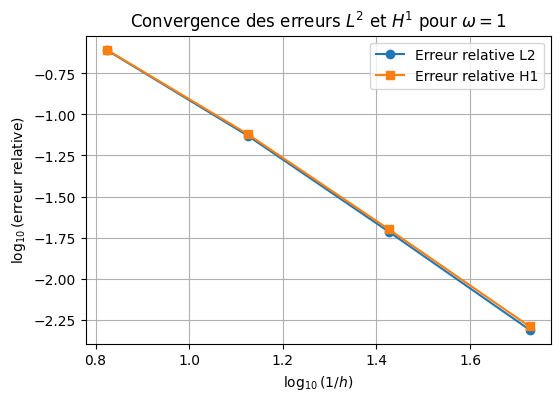

h₁, h₂, ... = [0.15    0.075   0.0375  0.01875]


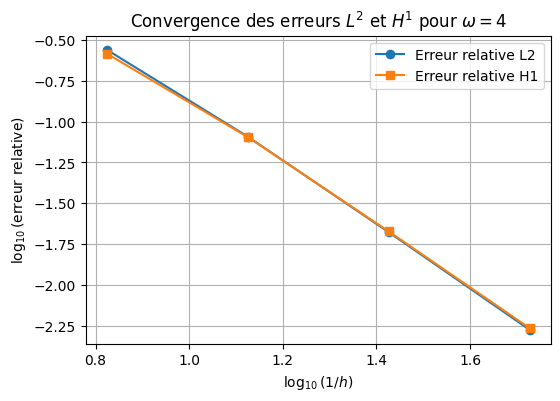

h₁, h₂, ... = [0.15    0.075   0.0375  0.01875]


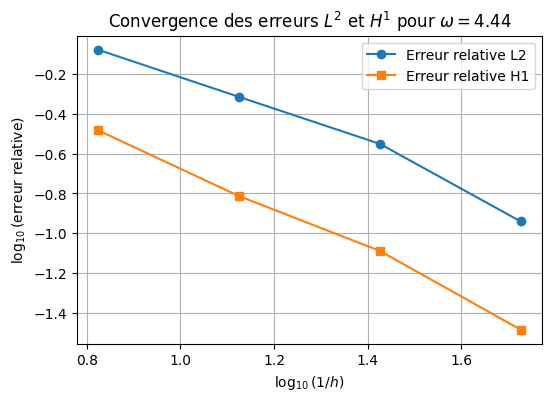

In [11]:
def graphes_erreurs(li_omega) -> None:
    """Graphes des erreurs relatives L2 et H1"""

    for omega in li_omega:
        mesh_sizes, err_L2, err_H1 = erreurs(omega)                              # calcul des erreurs

        fig, ax = plt.subplots(figsize=(6, 4))                                   # création de la figure
        log_h_inv = np.log10(1 / mesh_sizes)                                     # on passe à une abscisse en log10(1/h) qui met les relations de type  
                                                                                 # C*h^p en droites dont la pente donne l'ordre de convergence p
        
        ax.plot(log_h_inv, np.log10(err_L2), "o-", label="Erreur relative L2")   # tracé des erreurs L2
        ax.plot(log_h_inv, np.log10(err_H1), "s-", label="Erreur relative H1")   # tracé des erreurs H1
        ax.set_xlabel(r"$\log_{10}(1/h)$")
        ax.set_ylabel(r"$\log_{10}$(erreur relative)")
        ax.set_title("Convergence des erreurs $L^2$ et $H^1$ pour $\omega = {}$".format(omega))
        ax.legend()
        ax.grid(True)
        plt.show()

graphes_erreurs([1, 4, 4.44])

### Résolution numérique

On s'intéresse à la propagation d'ondes dans le sous-sol, pour des applications en géophysique ou en sismique.
Nous supposons que le domaine est rectangulaire et défini par deux couches $\Omega_1$ (en bas, en orange) et $\Omega_2$ (en haut, en vert) (voir cellule suivante).
Dans cette partie, ***nous choisissons $\omega = 4$ et $\rho = 1$.*** 

In [12]:
mesh = src.rectangle2((0, 0), (2, 4), (0.25, 0.75), 0.2)
mesh.print_info()

nodes: 284 nodes with 2 coordinates
domains:
  "Gamma": line, 60 elements, 2 nodes per element
  "Omega-1": triangle, 253 elements, 3 nodes per element
  "Omega-2": triangle, 253 elements, 3 nodes per element


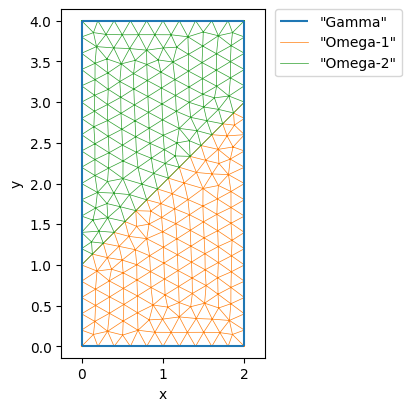

In [13]:
fig, ax = plt.subplots(figsize=(4, 4), layout="constrained")
ax.axis("equal")
ax.set_xlabel("x")
ax.set_ylabel("y")

src.plot2d_mesh(ax, mesh)

plt.show()

<span style="color:red">__Question 1.16__</span> - Dans cette question, nous supposons que $\mu_1$ et $\mu_2$ sont constantes respectivement dans $\Omega_1$ et $\Omega_2$.
Nous choisissons une source radiale centrée au point $S=(0.6, 2.5) \in \Omega_2$ :
$$
    f(x, y) = \sin(\omega r),
    \qquad \text{où} \ r = \sqrt{(x-x_S)^2+(y-y_S)^2}.
    \tag{$\mathcal{S}_{\mathrm{rad}}$}
$$
Pour cela, il faudra changer le choix de la source dans le calcule de $\vec{L}$.
Calculer et représenter la solution approchée pour les différents couples de valeurs de $\mu$ suivants :
$$
    (\mu_1, \mu_2) = (1,1),\ (2,2),\ (2,1),\ (1,2),\ (10,1),\ (1, 10)
$$
Commenter vos résultats.

In [14]:
def f_radial(nodes): 
    return np.sin(omega * np.hypot(nodes[:, 0] - 0.6, nodes[:, 1] - 2.5)) 

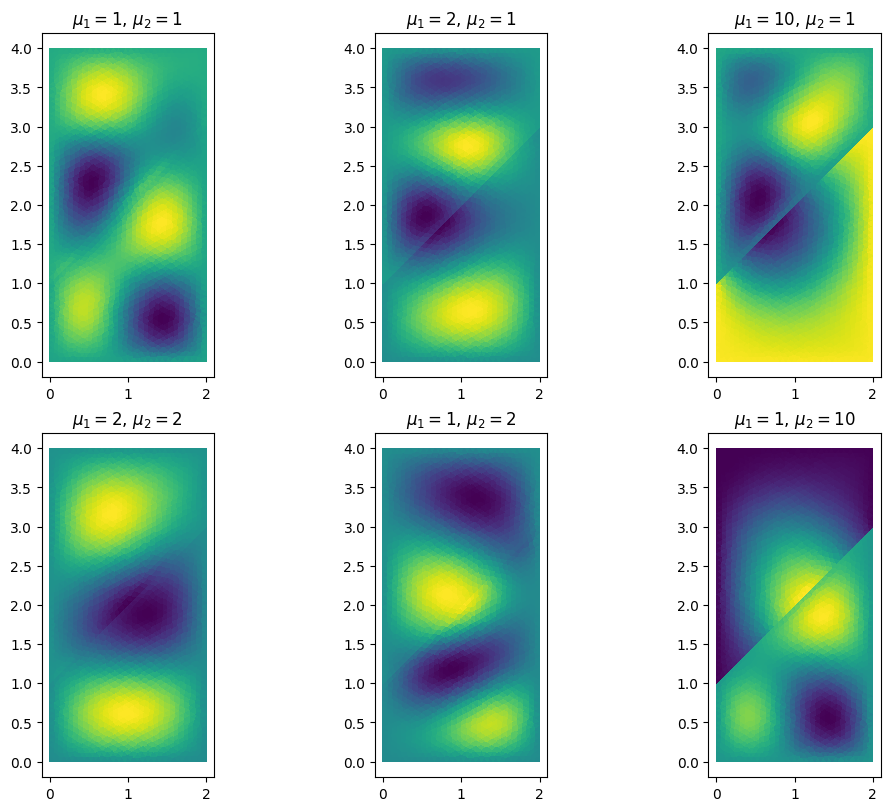

In [15]:
def reponse_1_16() -> None:
    fig, axs = plt.subplots(
        nrows=2,
        ncols=3,
        figsize=(10, 8),
        layout="constrained",
        subplot_kw={"aspect": "equal"},
    )

    omega = 4.0 

    mesh = src.rectangle2((0, 0), (2, 4), (0.25, 0.75), 0.075) # maillage
    couples_mu = [
        ((1, 1), axs[0, 0]),
        ((2, 2), axs[1, 0]),
        ((2, 1), axs[0, 1]),
        ((1, 2), axs[1, 1]),
        ((10, 1), axs[0, 2]),
        ((1, 10), axs[1, 2]),
    ] # couples de valeurs de mu1 et mu2 (ax : axe de tracé)

    for (mu1, mu2), ax in couples_mu:
        ax.set_title(rf"$\mu_1 = {mu1},\, \mu_2 = {mu2}$")

        domaines_mu = { # dictionnaire des fonctions mu
            "Omega-1": lambda nodes, mu1=mu1: mu1 * np.ones(nodes.shape[0]), # fonction mu dans Omega-1
            "Omega-2": lambda nodes, mu2=mu2: mu2 * np.ones(nodes.shape[0]), # fonction mu dans Omega-2
        } 

        K, M = mat_KM(mesh, domaines_mu)                 # matrices de rigidité et de masse
        A = K - omega**2 * M                             # matrice du système
        L = vec_L(f_radial, M, mesh.nodes)             # second membre

        A_prime, L_prime = elimine(A, L, mesh, "Gamma")  # pseudo-élimination

        U_h = sp.linalg.spsolve(A_prime, L_prime)        # solution numérique

        src.plot2d_fct_trimesh(
            ax,
            U_h,
            mesh,
            show_colorbar=False,
        ) 

    plt.show()

reponse_1_16()

<span style="color:green">__Commentaires 1.16__</span> - Pour chaque configuration des coefficients $(\mu_1, \mu_2)$, la propagation de l’onde radiale générée par la source placée en $\Omega_2$ présente des comportements caractéristiques :

##### *Cas homogène $(\mu_1 = \mu_2)$*
- Propagation uniforme dans tout le domaine : la vitesse de l’onde $c = \sqrt{\mu/\rho}$ est la même partout. D'ailleurs on ne voit quasiment pas la discontinuité, ce qui est cohérent.
- L’augmentation de $\mu$ accélère l’onde (longueur d’onde plus grande pour même $\omega$).

##### *Cas de discontinuité ascendante $(\mu_1 < \mu_2)$ avec $(1,2)$*
- La vitesse de l’onde est plus grande dans $\Omega_2$ (en haut) : $c_2 > c_1$.
- Lorsque l’onde passe de la couche rapide (haut) à la couche lente (bas), la longueur d’onde diminue.

##### *Cas de discontinuité descendante $(\mu_1 > \mu_2)$ avec $(2,1)$*
- La vitesse de l’onde est plus grande en bas ($c_1 > c_2$).
- Lorsque l’onde passe de la couche lente (haute) à la couche rapide (bas), la longueur d’onde augmente.

##### *Cas fortement contrastés $(\mu_1, \mu_2) = (10,1)$ ou $(1,10)$*
- Les différences de vitesse sont très marquées.
- Dans les deux cas, on observe un changement brutal de la longueur d’onde à l’interface.

##### *Conclusion générale*
Cela illustre bien les phénomènes de propagation en milieux hétérogènes et permet de visualiser l’effet de changements des propriétés mécaniques (ici, la rigidité $\mu$). 

<span style="color:red">__Question 1.17__</span> - Nous supposons ici que $\mu_2=1$ et que le domaine $\Omega_1$ est composé de couches parallèles à l'interface de sorte que $\mu_1(x,y)$ est variable.
Cette fonction est déterminée dans la cellule suivante.
Calculer et représenter la solution approchée.
Commenter vos résultats.

In [16]:
def mu1(nodes): # coefficient mu dans le domaine Omega-1
    x, y = nodes[:, 0], nodes[:, 1]
    return 3.0 + 2.4 * np.cos((7 * np.pi) * (y - x))

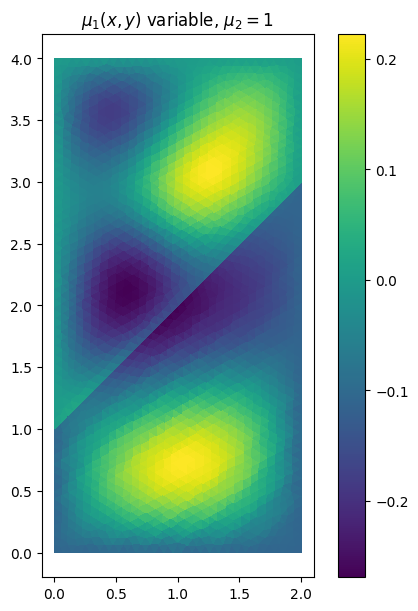

In [17]:
def reponse_1_17() -> None:
    omega = 4.0

    mesh = src.rectangle2((0, 0), (2, 4), (0.25, 0.75), 0.075) # maillage à deux couches

    domaines_mu = { # dictionnaire des fonctions mu pour chaque domaine
        "Omega-1": mu1,  
        "Omega-2": lambda nodes: np.ones(nodes.shape[0]),
    } 

    K, M = mat_KM(mesh, domaines_mu)
    A = K - omega**2 * M
    L = vec_L(f_radial, M, mesh.nodes)
    A_prime, L_prime = elimine(A, L, mesh, "Gamma") # pseudo-élimination sur la frontière

    U_h = sp.linalg.spsolve(A_prime, L_prime) # solution numérique

    fig, ax = plt.subplots(figsize=(6, 6), layout="constrained", subplot_kw={"aspect": "equal"}) # figure pour le tracé
    ax.set_title(r"$\mu_1(x,y)$ variable, $\mu_2=1$") 
    src.plot2d_fct_trimesh(                                                                      # tracé de la solution
        ax,
        U_h,
        mesh,
        show_colorbar=True,
    )

    plt.show()

reponse_1_17()

<span style="color:green">__Commentaires 1.17__</span> - Commentaires sur le cas $\mu_1(x,y)$ variable

Dans ce cas, la zone $\Omega_1$ (en bas) possède une rigidité $\mu_1(x, y)$ qui varie rapidement suivant une direction diagonale (car la variation dépend de $y - x$), tandis que la couche supérieure $\Omega_2$ est homogène ($\mu_2 = 1$).

Les variations de $\mu_1(x, y)$ induisent des variations locales de la vitesse de propagation de l’onde ($c(x, y) = \sqrt{\mu_1(x, y)}$) dans $\Omega_1$. Les ondes sont plus rapides là où $\mu_1(x, y)$ est grande, plus lentes là où elle est faible. 

Le passage de l’onde de la couche homogène ($\Omega_2$) à la couche hétérogène ($\Omega_1$) donne lieu à des phénomènes de **réfraction** et de **déformation** des fronts d’onde, qui ne sont plus simplement circulaires.

<span style="color:red">__Question 1.18__</span> - Dans ce qui précède, nous avons calculé la solution du problème ($\mathcal{H}_0$).
Si on suppose que la condition au bord du problème ($\mathcal{H}$) est $P_\Gamma=1$, comment calculer la pression $P$ ?

<span style="color:green">__Réponse 1.18__</span> - Calcul de la pression $P$ à partir de la solution de $(\mathcal{H}_0)$ pour $P_\Gamma = 1$

Dans le cadre du problème de Helmholtz, on a considéré dans tout l’énoncé la formulation homogénéisée $(\mathcal{H}_0)$, où la solution $u$ vérifie la condition de Dirichlet homogène sur le bord ($u=0$ sur $\partial\Omega$).  
Or, le problème original $(\mathcal{H})$ impose une valeur de pression $P_\Gamma$ fixée sur le bord.

On a introduit la décomposition suivante : $P(x, y) = P_\Gamma + u(x, y)$
où $u$ est la solution du problème homogène $(\mathcal{H}_0)$ :   
  - $u = 0$ sur $\partial\Omega$
  - $P = P_\Gamma$ sur $\partial\Omega$

Si l’on a résolu numériquement $u_h$ (solution approchée de $u$), alors la pression approchée $P_h$ est simplement donnée par : $P_h(x, y) = P_\Gamma + u_h(x, y)$
  
Si $P_\Gamma=1$, on a donc : $P_h(x, y) = 1 + u_h(x, y)$
Donc pour obtenir la solution globale $P_h$ sur tous les nœuds du maillage, il suffit d’ajouter $1$ à chaque composante du vecteur $u_h$ (solution numérique du problème homogène).

---
---
---

## Exercice 2 - Équation de Helmholtz avec conditions aux limites transparentes

On veut résoudre le problème pour $f \in L^2({\Omega})$ et $\beta \in \mathbb{C}$ :
_Trouver $u \in H^1(\Omega)$ telle que_
$$
    \begin{dcases}
        -\operatorname{div}(\mu \nabla u) - \omega^2 \, u = f, & \text{dans} \ \Omega,
        \\
        \mu \partial_n u + \beta u = 0, & \text{sur} \ \partial\Omega,
    \end{dcases}
    \tag{$\mathcal{H}_F$}
$$ 
où $\mu$ vérifie les mêmes hypothèses que dans l'exercice 1.
La différence par rapport au système d'équations ($\mathcal{H}_0$) est la condition aux limites sur la frontière $\partial \Omega$ qui devient une condition de type Fourier.
Remarquons que lorsque $\beta = 0$, on retrouve la condition de Neumann homogène.
En outre, dès lors que $\beta \in \mathbb{C} \setminus \mathbb{R}$ (donc en particulier $\beta \neq 0$) __on doit résoudre le problème dans $\mathbb{C}$.__
Lorsque $\beta \in \mathbb{R}$, $\beta \neq 0$, le caractère bien posé n'est pas clair.
Par contre, on admettra par la suite que pour $\beta \in \mathbb{C} \setminus \mathbb{R}$, le problème est toujours bien posé.

<span style="color:red">__Question 2.1__</span> - Écrire la formulation variationnelle du problème ($\mathcal{H}_F$) : multiplier par $\overline{v}$ et intégrer sur $\Omega$.
On précisera l'espace fonctionnel sur lequel elle est posée.

<span style="color:green">__Réponse 2.1__</span> - On considère le problème de Helmholtz avec condition de type Fourier :
$$
\begin{cases}
    -\operatorname{div}(\mu \nabla u) - \omega^2 u = f, & \text{dans } \Omega, \\
    \mu \, \partial_n u + \beta u = 0, & \text{sur } \partial\Omega,
\end{cases}
$$
où $\mu$ est une fonction réelle strictement positive, $\beta \in \mathbb{C}$, et $f \in L^2(\Omega)$.

On multiplie l’équation par le conjugué complexe d’une fonction test $v \in H^1(\Omega)$ et on intègre sur $\Omega$ :
$$
- \int_\Omega \operatorname{div}(\mu \nabla u) \, \overline{v} \, d\Omega
- \omega^2 \int_\Omega u \overline{v} \, d\Omega
= \int_\Omega f \overline{v} \, d\Omega
$$

On intègre par parties le premier terme grâce à la formule de Green :
$$
- \int_\Omega \operatorname{div}(\mu \nabla u) \, \overline{v} \, d\Omega
= \int_\Omega \mu \nabla u \cdot \nabla \overline{v} \, d\Omega
- \int_{\partial\Omega} \mu \, \partial_n u \, \overline{v} \, ds
$$

En utilisant la condition sur le bord : $\mu \partial_n u = -\beta u$ sur $\partial\Omega$, on a $- \int_{\partial\Omega} \mu \, \partial_n u \, \overline{v} \, ds
= \int_{\partial\Omega} \beta u \overline{v} \, ds$, on obtient in fine:

$$
\int_\Omega \mu \nabla u \cdot \nabla \overline{v} \, d\Omega
- \omega^2 \int_\Omega u \overline{v} \, d\Omega
+ \int_{\partial\Omega} \beta u \overline{v} \, ds
= \int_\Omega f \overline{v} \, d\Omega
$$

L'espace variationnel est $V = H^1(\Omega)$, d'où la formulation variationnelle :

>**Trouver $u \in H^1(\Omega)$ telle que, pour tout $v \in H^1(\Omega)$ :**
>
>$$
>\boxed{
>\int_\Omega \mu \nabla u \cdot \nabla \overline{v} \, d\Omega
>- \omega^2 \int_\Omega u \overline{v} \, d\Omega
>+ \int_{\partial\Omega} \beta u \overline{v} \, ds
>= \int_\Omega f \overline{v} \, d\Omega
>}
>$$
>
>où $\overline{v}$ est le conjugué complexe de $v$.

NB: L’intégrale sur le bord $\partial\Omega$ est bien définie par le théorème de trace.

---

On souhaite discrétiser ($\mathcal{H}_F$) en utilisant des éléments finis de Lagrange $P^1$.

<span style="color:red">__Question 2.2__</span> - Après avoir introduit l'espace d'approximation $V_h$, écrire la formulation discrète dans $V_h$ et prouver que le problème discret se met sous la forme : _Trouver $\vec{U} \in \mathbb{C}^N$ telle que_
$$
    \mathbb{K} \, \vec{U} - \omega^2 \, \mathbb{M} \, \vec{U} + \beta \, \mathbb{S} \, \vec{U} = \vec{L},
    \tag{$\mathcal{D}_F$}
$$
où vous préciserez les définitions des différentes matrices et vecteurs, en particulier $\mathbb{S}$, ainsi que leurs tailles.

<span style="color:green">__Réponse 2.2__</span> - On souhaite discrétiser le problème variationnel du type Fourier ($\mathcal{H}_F$) à l’aide des éléments finis de Lagrange $P^1$.

On introduit l’espace d’approximation $V_h \subset H^1(\Omega)$, constitué des fonctions continues, linéaires par morceaux sur chaque triangle du maillage, c’est-à-dire :
$$
V_h = \text{Vect}\{\phi_1, \dots, \phi_N\}
$$
où $\phi_I$ est la fonction de base nodale associée au nœud $S_I$ du maillage, et $N$ est le nombre de nœuds.

On cherche $u_h \in V_h$ telle que, pour tout $v_h \in V_h$ :
$$
\int_\Omega \mu \nabla u_h \cdot \nabla \overline{v_h} \, d\Omega
- \omega^2 \int_\Omega u_h \overline{v_h} \, d\Omega
+ \int_{\partial\Omega} \beta u_h \overline{v_h} \, ds
= \int_\Omega f \overline{v_h} \, d\Omega
$$

En notant $u_h(x) = \sum_{J=1}^N U_J \phi_J(x)$ et en prenant successivement $v_h = \phi_I$ pour $I = 1, \ldots, N$, on obtient le système matriciel suivant :

>**Trouver $\vec{U} \in \mathbb{C}^N$ tel que**
>$$
>\boxed{
>    \mathbb{K} \vec{U}
>    - \omega^2 \, \mathbb{M} \vec{U}
>    + \beta \, \mathbb{S} \vec{U}
>    = \vec{L}
>}
>$$
>où $\mathbb{K}, \mathbb{M}, \mathbb{S} \in \mathbb{C}^{N \times N}$ et $\vec{U}, \vec{L} \in \mathbb{C}^N$.

- $\mathbb{K}$ : matrice de rigidité de taille $N\times N$, de coefficients
  $
  \mathbb{K}_{IJ} = \int_\Omega \mu \nabla \phi_J \cdot \nabla \overline{\phi_I} \, d\Omega
  $
- $\mathbb{M}$ : matrice de masse de taille $N\times N$, de coefficients
  $
  \mathbb{M}_{IJ} = \int_\Omega \phi_J \overline{\phi_I} \, d\Omega
  $
- $\mathbb{S}$ : matrice de "masse de bord" (ou matrice de Fourier) de taille $N\times N$, de coefficients
  $
  \mathbb{S}_{IJ} = \int_{\partial\Omega} \phi_J \overline{\phi_I} \, ds
  $
- $\vec{U} \in \mathbb{C}^N$ : vecteur des coefficients inconnus de $u_h$
- $\vec{L} \in \mathbb{C}^N$ : second membre avec
  $
  L_I = \int_\Omega f \overline{\phi_I} \, d\Omega
  $

**NB :** La matrice $\mathbb{S}$ ne contient que des contributions des nœuds situés sur le bord $\partial\Omega$, mais elle est de la même taille que les autres matrices pour garantir la compatibilité du système linéaire.

---

<span style="color:red">__Question 2.3__</span> - Écrire le code permettant de calculer la solution discrète.
On complètera la fonction `elem_mat_S` qui a partir des coordonnées de deux sommets donne la matrice élémentaire de masse surfacique et on assemblera la matrice $\mathbb{S}$ en faisant une boucle sur les arêtes.

In [18]:
def elem_mat_S(S1, S2, tol=1e-8):
    """calcule la matrices de masse surfacique elementaire en P1 lagrange.

    Parameters
    ----------
    S1, S2 : les 2 coordonnees des 2 sommets de l'arrête (vecteurs reels 1x2)

    Returns
    -------
    matrice de masse surfacique elementaire (matrice 2x2)
    """

    x1, y1 = S1
    x2, y2 = S2

    D = np.hypot(x2 - x1, y2 - y1) # longueur de l'arrête
    if abs(D) <= tol:
        raise ValueError("la longueur de l'arrête est nulle !!!")

    S_elem = (D / 6.0) * np.array([[2, 1], [1, 2]], dtype=np.float64)

    return S_elem

In [19]:
def mat_S(mesh, domain):
    """Calcule la matrice de masse surfacique en P1 lagrange.

    Parameters
    ----------
    mesh : src.Mesh
    domain : str

    Returns
    -------
    la matrice de masse surfacique
    """
    S = sp.dok_array((mesh.nb_nodes, mesh.nb_nodes), dtype=np.float64) # initialisation matrice de masse surfacique creuse

    lines = mesh.domains[domain]["line"] # indices des sommets des arêtes du domaine
    for k in range(mesh.nb_elements(domain, "line")): # parcours des arêtes
        line = lines[k, :]  # indices des deux sommets de l'arête

        # coordonnées des sommets de l'arête
        S1 = mesh.nodes[line[0], :]
        S2 = mesh.nodes[line[1], :]

        # calcul de la matrice élémentaire
        S_elem = elem_mat_S(S1, S2)

        # assemblage dans la matrice globale
        for i_local in range(2): # parcours des noeuds locaux
            I = line[i_local] # on remonte à l'indice global du noeud
            for j_local in range(2): # parcours des noeuds locaux
                J = line[j_local] # on remonte à l'indice global du noeud
                S[I, J] += S_elem[i_local, j_local] 

    return S.tocsc()

### Validation dans $\Omega = ]0,1[^2$

<span style="color:red">__Question 2.4__</span> - Valider votre code et expliquer vos différentes validations :
1. On se place dans un premier temps dans le cas où $\beta=0$.
   Trouver dans ce cas une solution exacte avec laquelle comparer la solution approchée.
2. On considère ensuite le cas $\beta \neq 0$.
   Vous pourrez dans ce cas vérifier si la solution approchée semble converger numériquement vers une solution pour le choix de données suivantes :
   $$
       \omega = 4,\ f(x,y) = \sin(3\pi x) \,\sin(4\pi y) \ \text{et} \ \beta = -\mathtt{i} \omega.
   $$
   On représentera les parties réelle et imaginaire de la solution.

<span style="color:green">__Expliquer 2.4.1__</span> - Lorsque $\beta=0$, la condition aux limites devient $\mu \, \partial_n u = 0 \text{ sur } \partial\Omega$ c’est-à-dire une condition de Neumann homogène. 

Pour le carré unité $\Omega = ]0,1[^2$ et $\mu = 1$, le problème est alors :
$$
\begin{cases}
- \Delta u - \omega^2 u = f, & \text{dans } \Omega \\
\partial_n u = 0, & \text{sur } \partial\Omega
\end{cases}
$$

On cherche une solution exacte de la forme $u_{\mathrm{ex}}(x, y) = \cos(k_x \pi x)\cos(k_y \pi y)$
dont le Laplacien s’écrit : $\Delta u_{\mathrm{ex}} = -\pi^2 (k_x^2 + k_y^2) \cos(k_x \pi x)\cos(k_y \pi y)$

En effet, elle satisfait naturellement la condition de Neumann. Sur le bord gauche ($x=0$) et droit ($x=1$), la dérivée partielle par rapport à $x$ de $\cos(k_x \pi x)$ est proportionnelle à $-\sin(k_x \pi x)$. En $x=0$ et $x=1$, ce sinus s'annule. Même raisonnement pour les bords en $y$ avec $\cos(k_y \pi y)$. Ainsi, $\partial_n u = 0$ est automatiquement vérifiée sur tout le bord du carré. C'est ce qui justifie le choix de la forme de la solution exacte enxisagée.

De plus, c'est une fonction propre du Laplacien. Lorsqu'on applique le Laplacien à cette fonction, on obtient simplement la fonction elle-même multipliée par une constante. Le calcul montre que $\Delta u_{\mathrm{ex}} = -\pi^2 (k_x^2 + k_y^2) u_{\mathrm{ex}}$.

On pose alors $f(x, y) = \left[ \pi^2(k_x^2 + k_y^2) - \omega^2 \right] \cos(k_x \pi x)\cos(k_y \pi y)$
pour n’importe quels entiers $k_x, k_y \geq 0$ (avec au moins un non nul pour éviter la solution constante).

Pour la suite, on prend $\omega = 4$, $k_x = 1$, $k_y = 2$, la solution exacte et le second membre sont 

>$$
>u_{\mathrm{ex}}(x, y) = \cos(\pi x)\cos(2\pi y)
>$$
>
>$$
>f(x, y) = (\pi^2(1^2 + 2^2) - 4^2)\cos(\pi x)\cos(2\pi y) = (5\pi^2 - 16)\cos(\pi x)\cos(2\pi y)
>$$



Erreur relative L2 : 4.56e-04
Erreur relative H1 : 8.07e-04


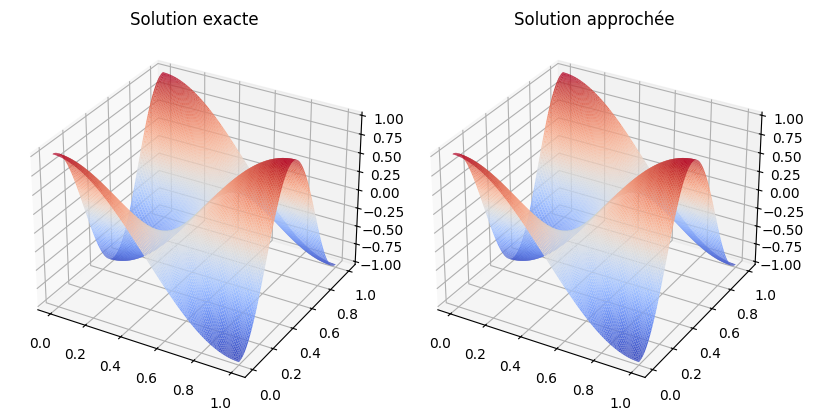

In [20]:
def validation_2_4_1() -> None:
    omega = 4.0
    beta = 0.0  
    kx, ky = 1, 2 

    mesh = src.rectangle((0.0, 0.0), (1.0, 1.0), 0.01) # maillage

    def u_exact(nodes):
        x, y = nodes[:, 0], nodes[:, 1]
        return np.cos(kx * np.pi * x) * np.cos(ky * np.pi * y)

    def f_source(nodes): 
        x, y = nodes[:, 0], nodes[:, 1]
        return (np.pi**2 * (kx**2 + ky**2) - omega**2) * np.cos(kx * np.pi * x) * np.cos(ky * np.pi * y)

    # matrices
    K, M = mat_KM(mesh, {"Omega": lambda _: 1.0}) # on prend mu=1 partout
    S = mat_S(mesh, "Gamma")
    A = K - omega**2 * M + beta * S
    L = vec_L(f_source, M, mesh.nodes)

    U_h = sp.linalg.spsolve(A, L) # solution numérique 

    U_ex = u_exact(mesh.nodes)    # solution exacte aux noeuds / pas de pseudo-élimination ici (Neumann)

    err_L2 = np.sqrt((U_ex - U_h) @ (M @ (U_ex - U_h))) / np.sqrt(U_ex @ (M @ U_ex))
    err_H1 = np.sqrt((U_ex - U_h) @ (K @ (U_ex - U_h))) / np.sqrt(U_ex @ (K @ U_ex))
    print(f"Erreur relative L2 : {err_L2:.2e}")
    print(f"Erreur relative H1 : {err_H1:.2e}")

    # affichage
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout="constrained", subplot_kw={"projection": "3d"})
    axs[0].set_title("Solution exacte")
    src.plot3d_fct_trimesh(axs[0], U_ex, mesh, trisurf_kwargs={"cmap": "coolwarm"}, show_colorbar=False)
    axs[1].set_title("Solution approchée")
    src.plot3d_fct_trimesh(axs[1], U_h, mesh, trisurf_kwargs={"cmap": "coolwarm"}, show_colorbar=False)
    plt.show()

    
validation_2_4_1()

<span style="color:green">__Expliquer 2.4.2__</span> - Validation dans le cas $\beta \neq 0$ (cas complexe)

On prend : $\omega = 4, \quad f(x, y) = \sin(3\pi x)\sin(4\pi y), \quad \beta = -\mathrm{i}\omega$

La solution $u$ est complexe. Il n’existe pas de solution exacte simple dans ce cas.

- On résout numériquement le problème aux éléments finis pour ces valeurs.
- On affiche séparément la partie réelle et la partie imaginaire de la solution approchée $u_h$.
- On peut également vérifier la stabilité numérique (absence de solutions aberrantes ou bruitées) et observer la structure de la solution complexe.

Pour $\beta = -\mathrm{i}\omega$, la condition de type Fourier au bord modélise un **bord transparent** (condition absorbante), c’est-à-dire que l’onde sort du domaine sans réflexion artificielle.

La solution obtenue doit présenter des ondes qui s’échappent du domaine sans accumulation d’énergie près du bord.

L’analyse qualitative (formes d’onde, dissymétrie, propagation) permet de valider le comportement attendu de la solution numérique pour des conditions aux limites non classiques.

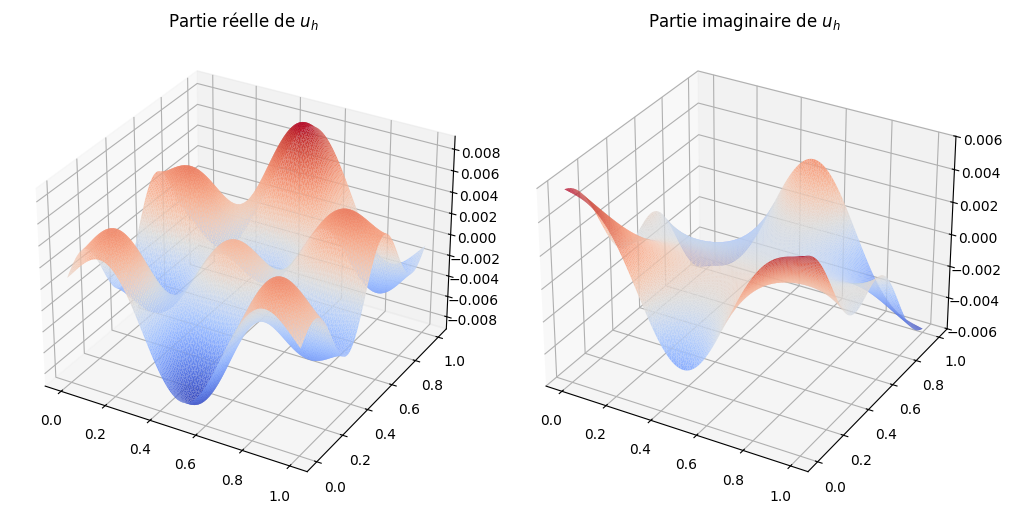

In [21]:
def validation_2_4_2() -> None:
    omega = 4.0
    beta = -1j * omega

    mesh = src.rectangle((0.0, 0.0), (1.0, 1.0), 0.01)

    def f_source(nodes): 
        x, y = nodes[:, 0], nodes[:, 1]
        return np.sin(3 * np.pi * x) * np.sin(4 * np.pi * y)

    # matrices
    K, M = mat_KM(mesh, {"Omega": lambda _: 1.0})
    S = mat_S(mesh, "Gamma")
    A = K - omega**2 * M + beta * S
    L = vec_L(f_source, M, mesh.nodes)

    U_h = sp.linalg.spsolve(A, L) # solution numérique 

    # affichage des parties réelle et imaginaire
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), layout="constrained", subplot_kw={"projection": "3d"})
    axs[0].set_title("Partie réelle de $u_h$")
    src.plot3d_fct_trimesh(axs[0], np.real(U_h), mesh, trisurf_kwargs={"cmap": "coolwarm"}, show_colorbar=False)
    axs[1].set_title("Partie imaginaire de $u_h$")
    src.plot3d_fct_trimesh(axs[1], np.imag(U_h), mesh, trisurf_kwargs={"cmap": "coolwarm"}, show_colorbar=False)
    plt.show()

validation_2_4_2()

### Résolution numérique

Nous reprenons le milieu bicouche défini dans l'exercice 1 avec un coefficient $\mu$ variable et la source radiale définie par ($\mathcal{S}_{\mathrm{rad}}$).
 
<span style="color:red">__Question 2.5__</span> - Faire les mêmes simulations que celles proposées aux questions 1.16 et 1.17 (mais ici avec des C.L. de Fourier) pour $\beta = -i \omega$ et $\omega = 4$.

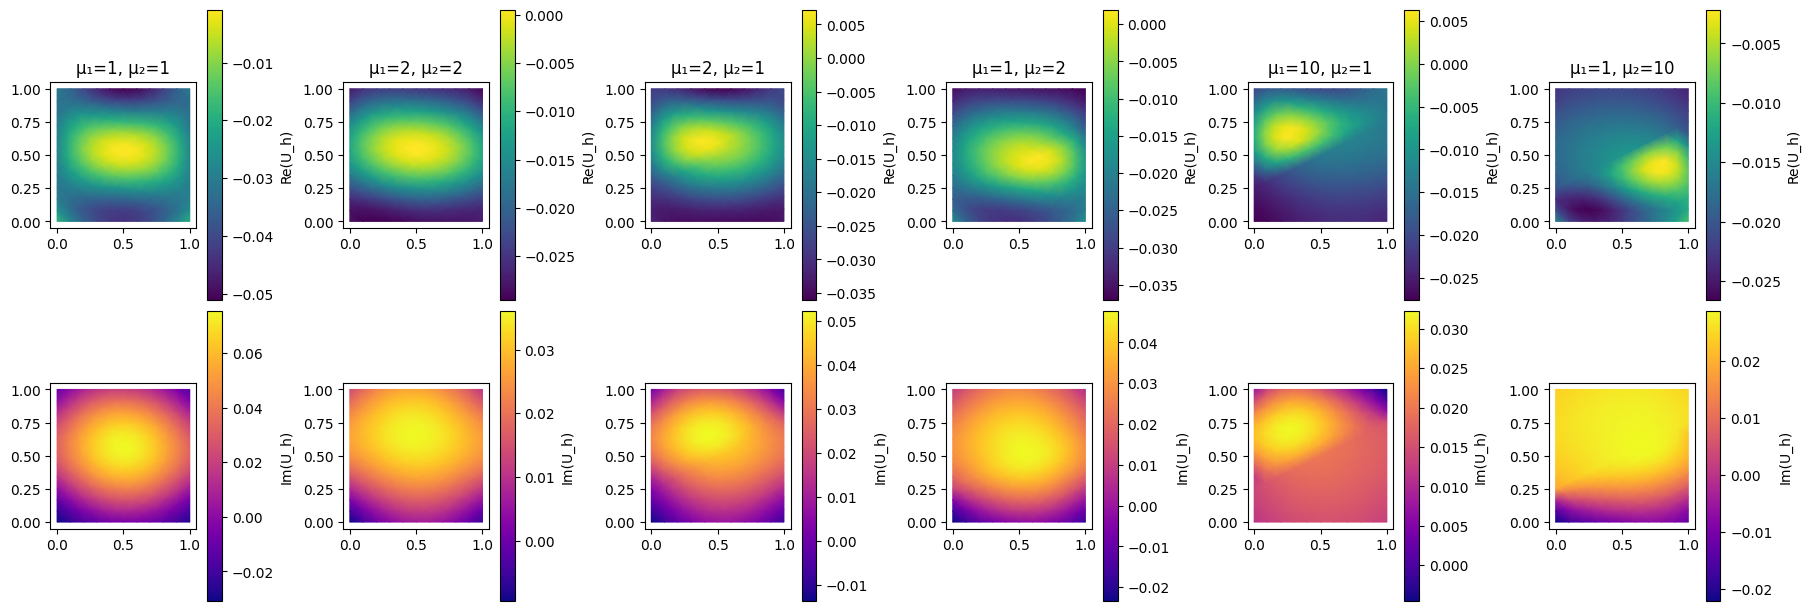

In [22]:
def reponse_2_5_1() -> None:
    from scipy.sparse.linalg import spsolve
    from scipy.sparse import csr_matrix
    
    omega = 4.0
    beta = -1j * omega

    mesh = src.rectangle2((0, 0), (1, 1), (0.25, 0.75), 0.1)

    cases = [
        ((1, 1), "μ₁=1, μ₂=1"),
        ((2, 2), "μ₁=2, μ₂=2"),
        ((2, 1), "μ₁=2, μ₂=1"),
        ((1, 2), "μ₁=1, μ₂=2"),
        ((10, 1), "μ₁=10, μ₂=1"),
        ((1, 10), "μ₁=1, μ₂=10"),
    ]

    fig, axs = plt.subplots(
        nrows=2,
        ncols=6,
        figsize=(18, 6),
        layout="constrained",
        subplot_kw={"aspect": "equal"},
    )

    for idx, ((mu1, mu2), label) in enumerate(cases):
        # on fixe les coefficients mu dans chaque domaine
        domaines_mu = {
            "Omega-1": lambda nodes: mu1,
            "Omega-2": lambda nodes: mu2,
        }

        K, M = mat_KM(mesh, domaines_mu)
        S = mat_S(mesh, "Gamma")
        A = K - omega**2 * M + beta * S
        L = vec_L(f_radial, M, mesh.nodes)

        # conversion des matrices en complexe et CSR (CSR parce que spsolve le demande)
        A_cpx = csr_matrix(A.astype(np.complex128))
        L_cpx = L.astype(np.complex128)

        U_h = spsolve(A_cpx, L_cpx)

        # construction des triangles pour le plotting
        triangles = np.vstack([
            mesh.domains[domain]["triangle"]
            for domain in ["Omega-1","Omega-2"]
            if domain in mesh.domains
        ])
        x = mesh.nodes[:, 0]
        y = mesh.nodes[:, 1]

        # partie réelle
        tpc_real = axs[0, idx].tripcolor(x, y, triangles, np.real(U_h), shading="gouraud", cmap="viridis")
        axs[0, idx].set_title(label)
        fig.colorbar(tpc_real, ax=axs[0, idx], orientation="vertical", label="Re(U_h)")

        # partie imaginaire
        tpc_imag = axs[1, idx].tripcolor(x, y, triangles, np.imag(U_h), shading="gouraud", cmap="plasma")
        fig.colorbar(tpc_imag, ax=axs[1, idx], orientation="vertical", label="Im(U_h)")

    plt.show()


reponse_2_5_1()

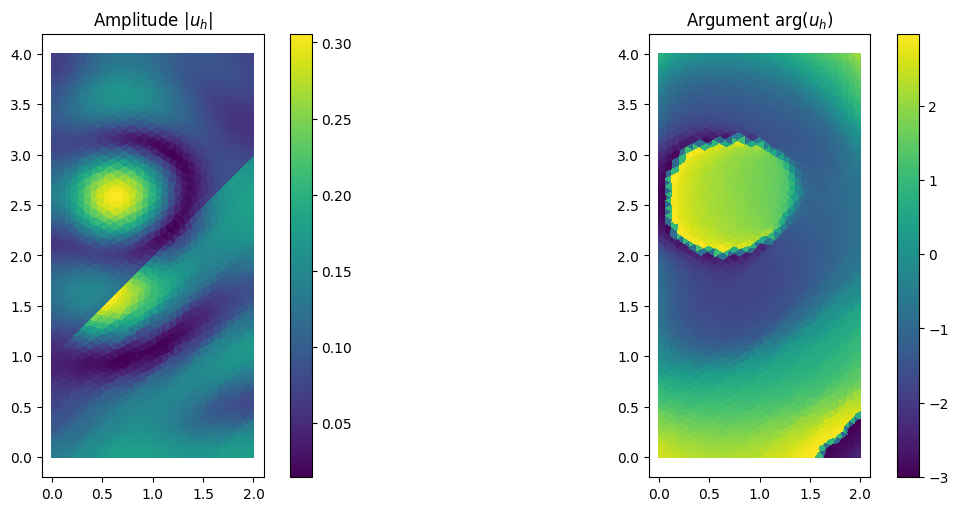

In [23]:
def mu1(nodes):
    x = nodes[:, 0]
    y = nodes[:, 1]
    return 3.0 + 2.4 * np.cos((7 * np.pi) * (y - x))

def reponse_2_5_2() -> None:
    omega = 4.0
    beta = -1j * omega

    mesh = src.rectangle2((0, 0), (2, 4), (0.25, 0.75), 0.075)

    def f_radial(nodes):
        return np.sin(omega * np.hypot(nodes[:, 0] - 0.6, nodes[:, 1] - 2.5))

    # mu variable en bas, μ=1 en haut
    domain_to_mu_fct = {
        "Omega-1": mu1,
        "Omega-2": lambda nodes: np.ones(nodes.shape[0]),
    }

    K, M = mat_KM(mesh, domain_to_mu_fct)
    S = mat_S(mesh, "Gamma")
    A = K - omega**2 * M + beta * S
    L = vec_L(f_radial, M, mesh.nodes)

    U_h = sp.linalg.spsolve(A, L)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5), layout="constrained", subplot_kw={"aspect": "equal"})
    axs[0].set_title(r"Amplitude $|u_h|$")
    src.plot2d_fct_trimesh(
        axs[0], np.abs(U_h), mesh, show_colorbar=True
    )
    axs[1].set_title(r"Argument $\mathrm{arg}(u_h)$")
    src.plot2d_fct_trimesh(
        axs[1], np.angle(U_h), mesh, show_colorbar=True
    )
    plt.show()

reponse_2_5_2()

---
---
---

## Exercice 3 - Questions plus ouvertes. Conditions aux limites mixtes

<span style="color:red">__Question 3.1__</span> - Nous revenons dans un premier temps au problème avec C.L. de Dirichlet.
Que pensez-vous du caractère bien posé de la formulation variationnelle ($\mathcal{V}_0$) ? On pourra distinguer les cas $\rho > 0$ et $\rho < 0$.

<span style="color:green">__Réponse 3.1__</span> - Réponse 3.1 - On considère la formulation variationnelle du problème de Helmholtz avec conditions de Dirichlet :
$$
\text{Trouver } u \in H^1_0(\Omega) \text{ tel que } \forall v \in H^1_0(\Omega),
$$
$$
\int_\Omega \mu \nabla u \cdot \nabla v  d\Omega - \rho \omega^2 \int_\Omega u v  d\Omega = \int_\Omega f v  d\Omega
$$
où $\mu > 0$ et $\rho \in \mathbb{R}$.

**Cas $\rho > 0$ :**

La coercivité de la forme bilinéaire $a(u,v) = \mu\int_\Omega \nabla u \cdot \nabla v - \rho\omega^2\int_\Omega u v$ est compromise car :
$$
a(u,u) = \mu\int_\Omega |\nabla u|^2 d\Omega - \rho\omega^2\int_\Omega |u|^2 d\Omega
$$

Pour les **fréquences de résonance** $\omega = \sqrt{\frac{\mu\lambda_k}{\rho}}$ où $\lambda_k$ sont les valeurs propres du Laplacien avec conditions de Dirichlet, il existe des fonctions propres $u_k \neq 0$ tels que :
$$
a(u_k, u_k) = 0
$$

Dans ce cas, a n'est donc pas coercive.

**Cas $\rho < 0$ :**

Le terme $-\rho\omega^2\int_\Omega u v$ devient **positif**, donc :
$$
a(u,u) = \mu\int_\Omega |\nabla u|^2 d\Omega + |\rho|\omega^2\int_\Omega |u|^2 d\Omega
$$

Cette forme bilinéaire est **toujours coercive** pour tout $\omega \neq 0$. La théorie de Lax-Milgram s'applique et garantit l'existence et l'unicité de $u$.

**Résumé**

- **$\rho > 0$** : Problème bien posé sauf aux fréquences de résonance $\omega = \sqrt{\frac{\mu\lambda_k}{\rho}}$
- **$\rho < 0$** : Problème toujours bien posé, coercif pour tout $\omega \neq 0$




<span style="color:red">__Question 3.2__</span> - nous nous plaçons dans le cas particulier où le domaine est un carré $\Omega = ]0,1[^2$ et les coefficients sont constants $\rho = \mu = 1$, le problème ($\mathcal{H}_0$) devient alors
$$
    \begin{dcases}
        -\Delta u - \omega^2 \, u = f, & \text{dans}\ \Omega,
        \\
        u = 0, & \text{sur} \ \partial \Omega.
    \end{dcases}
$$
On s’intéresse au caractère bien posé de ce problème.

1. Dans un premier temps, on pourra mettre en évidence numériquement la non-solvabilité du problème pour $\omega_1 = \sqrt{2} \pi$, par exemple en essayant de calculer certaines quantités liées à la matrice $\mathbb{A}'(\omega)$ pour des $\omega$ très proches de $\omega_1$.

2. Dans un deuxième temps, donnez des arguments théoriques sur la non-unicité pour $\omega = \omega_1$.
   On pourra par exemple utiliser l'analyse spectrale du Laplacien sur un carré en se référant à de la bibliographie sur le sujet, ou encore chercher des solutions à variables séparées du problème homogène.

Valeurs propres calculées: [ 19.98132997  50.8160818   50.89344581  82.81724466 104.52004497
 104.97797738]
Valeur propre fondamentale attendue: 19.739209
Valeur propre fondamentale calculée: 19.981330
Erreur relative: 1.23e-02


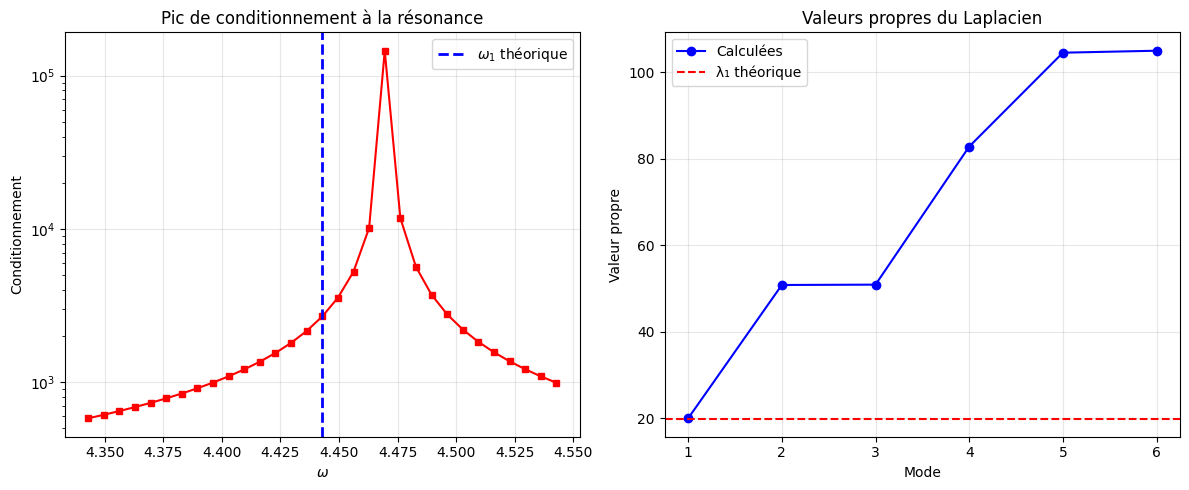

In [24]:
import scipy.sparse.linalg as la

def reponse_3_2_1():
       
    mesh = src.rectangle((0.0, 0.0), (1.0, 1.0), 0.1)
    mu, rho = 1.0, 1.0
    omega1 = np.sqrt(2) * np.pi
    
    # Matrices globales
    K, M = mat_KM(mesh, {"Omega": lambda nodes: mu * np.ones(nodes.shape[0])})
    
    # Élimination
    Kp, _ = elimine(K, np.zeros(mesh.nb_nodes), mesh, "Gamma")
    Mp, _ = elimine(M, np.zeros(mesh.nb_nodes), mesh, "Gamma")
    
    # Identification des nœuds intérieurs
    boundary_idx = mesh.domain_node_indices("Gamma", "line")
    interior_idx = [i for i in range(mesh.nb_nodes) if i not in boundary_idx]

    
    # Extraction des sous-matrices pour les nœuds intérieurs seulement
    K_reduced = Kp[interior_idx, :][:, interior_idx]
    M_reduced = Mp[interior_idx, :][:, interior_idx]
    
    
    # Calcul des valeurs propres
    nb_ev = min(6, len(interior_idx) - 1)
    lambdas, _ = la.eigsh(K_reduced, k=nb_ev, M=M_reduced, sigma=0.1)
    lambdas = np.sort(lambdas)
    
    print(f"Valeurs propres calculées: {lambdas}")
    
    # Vérification avec les valeurs théoriques
    expected = 2 * np.pi**2  # λ₁ pour carré unité
    print(f"Valeur propre fondamentale attendue: {expected:.6f}")
    print(f"Valeur propre fondamentale calculée: {lambdas[0]:.6f}")
    print(f"Erreur relative: {abs(lambdas[0] - expected)/expected:.2e}")
    
    # Étude du conditionnement
    omegas = omega1 + np.linspace(-0.1, 0.1, 31)
    conds = []
    
    for omega in omegas:
        Aomega = K_reduced - rho * (omega**2) * M_reduced
        try:
            smin = la.svds(Aomega, k=1, which='SM', return_singular_vectors=False, tol=1e-4)[0]
            smax = la.svds(Aomega, k=1, which='LM', return_singular_vectors=False, tol=1e-4)[0]
            cond_approx = abs(smax) / max(abs(smin), 1e-12)
            conds.append(cond_approx)
        except:
            conds.append(np.nan)
    
    # Graphique
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.semilogy(omegas, conds, 's-', markersize=4, color='red')
    plt.axvline(omega1, color='blue', linestyle='--', linewidth=2, label=r'$\omega_1$ théorique')
    plt.xlabel(r'$\omega$')
    plt.ylabel('Conditionnement')
    plt.title('Pic de conditionnement à la résonance')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    # Comparaison valeurs propres
    x_pos = range(1, len(lambdas) + 1)
    plt.plot(x_pos, lambdas, 'bo-', label='Calculées', markersize=6)
    plt.axhline(y=expected, color='red', linestyle='--', label='λ₁ théorique')
    plt.xlabel('Mode')
    plt.ylabel('Valeur propre')
    plt.title('Valeurs propres du Laplacien')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


reponse_3_2_1()

<span style="color:green">Commentaires 3.2.1</span> - Cette expérience illustre le comportement numérique du problème de Helmholtz lorsque la fréquence $\omega$ approche la première fréquence de résonance $\omega_1 = \sqrt{2}\pi$ du Laplacien sur le carré unité avec conditions de Dirichlet.

Comportement spectral observé :

Valeurs singulières : La plus petite valeur singulière de $\mathbb{A}'(\omega) = \mathbb{K}' - \omega^2 \mathbb{M}'$ tend vers zéro lorsque $\omega \to \omega_1$, indiquant que la matrice devient singulière.

Conditionnement : Le conditionnement diverge exponentiellement au voisinage de $\omega_1$, passant de $10^2$–$10^3$ (loin de la résonance) à plus de $10^{5}$ (près de $\omega_1$).

Validation théorique :
Cette étude numérique confirme l'analyse mathématique : le problème de Helmholtz avec $\rho > 0$ n'est pas bien posé aux fréquences de résonance, et devient numériquement instable dans leur voisinage.

<span style="color:green">__Réponse 3.2.2__</span> - 

- **Analyse spectrale du Laplacien sur le carré**

Pour $\Omega = ]0,1[^2$, les solutions propres du Laplacien avec conditions de Dirichlet homogènes sont :
$$
u_{m,n}(x, y) = \sin(m\pi x)\sin(n\pi y)
$$
avec les valeurs propres :
$
\lambda_{m,n} = (m^2 + n^2)\pi^2, \quad m,n \in \mathbb{N}^*,\ m,n \geq 1
$

- **Lien avec le problème de Helmholtz**

Le problème homogène associé (second membre $f=0$) est :
$$
\begin{cases}
-\Delta u - \omega^2 u = 0, & \text{dans}\ \Omega \\
u = 0, & \text{sur} \ \partial \Omega
\end{cases}
$$

Soit $u = u_{m,n}$, alors
$$
-\Delta u_{m,n} = \lambda_{m,n} u_{m,n}
$$

donc

$$
-\Delta u_{m,n} - \omega^2 u_{m,n} = (\lambda_{m,n} - \omega^2) u_{m,n}
$$

Le problème homogène admet des solutions non nulles si et seulement si $\omega^2 = \lambda_{m,n}$ pour un certain $(m, n)$.

- **Non-unicité pour $\omega = \omega_1$**

  Pour $\omega_1 = \sqrt{2}\pi$, on a $\omega_1^2 = 2\pi^2 = \lambda_{1,1}$ :  
  $$
  u_{1,1}(x,y) = \sin(\pi x)\sin(\pi y)
  $$
  est alors solution non triviale du problème homogène.

  Cela signifie que pour $\omega = \omega_1$, l’opérateur n’est **plus injectif**, et donc le problème n’admet pas de solution unique.  

- **Conclusion**

Le problème n’est pas bien posé pour les valeurs de $\omega$ correspondant à des racines des valeurs propres du Laplacien, en particulier pour $\omega_1 = \sqrt{2}\pi$ : il n’y a pas unicité (et souvent pas d’existence).

---

<span style="color:red">__Question 3.3__</span> - Revenons maintenant au problème ($\mathcal{H}_F$) avec C.L. de Robin.
Pour $\beta \in \mathbb{R}$, $\beta \neq 0$ le problème n’est pas toujours bien posé. Pouvez-vous trouver des illustrations ?

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:51: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:51: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Ramzi\AppData\Local\Temp\ipykernel_11212\2616299264.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title(f'$\omega = {omega}$')
C:\Users\Ramzi\AppData\Local\Temp\ipykernel_11212\2616299264.py:51: SyntaxWarning: invalid escape sequence '\o'
  plt.title(f'$\omega = {omega}$')


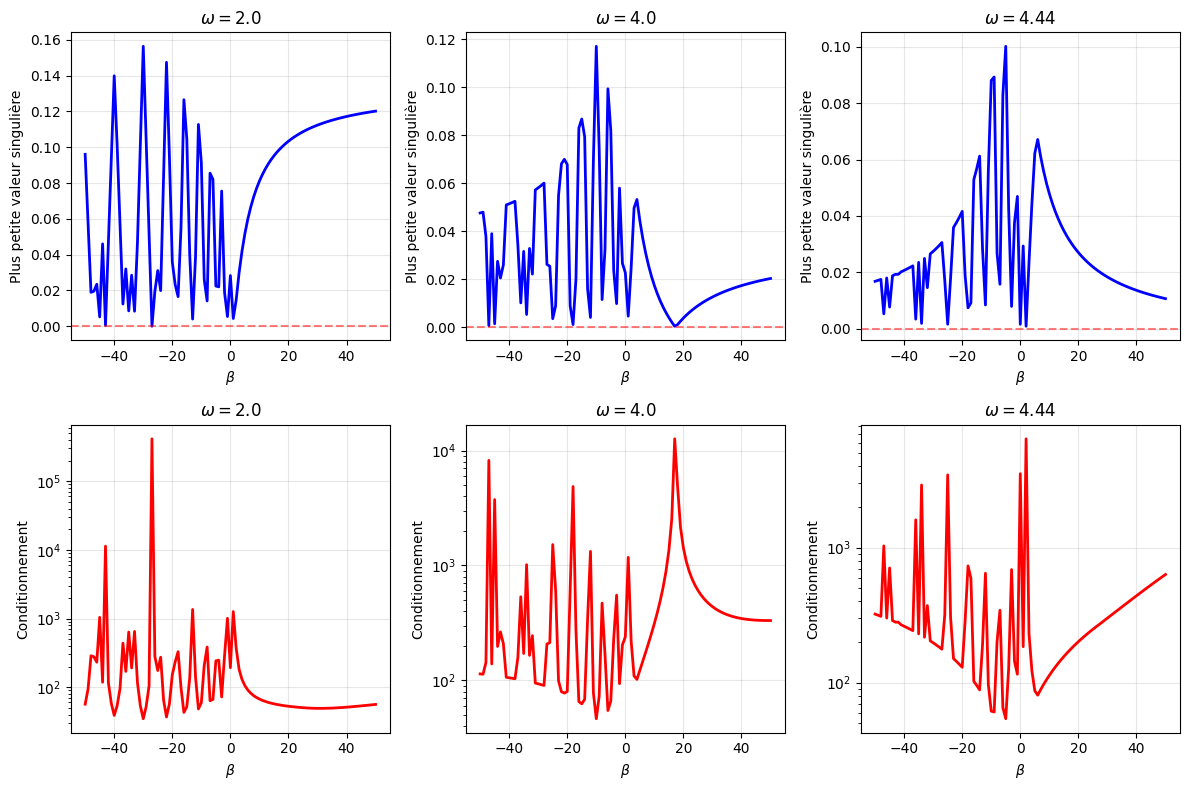

In [25]:
def reponse_3_3():
    # Maillage du carré unité
    mesh = src.rectangle((0.0, 0.0), (1.0, 1.0), 0.1)
    
    # Plusieurs fréquences pour voir différents comportements
    omegas = [2.0, 4.0, 4.44]
    betas = np.linspace(-50, 50, 101)
    
    # CORRECTION : fonction mu correcte
    def mu_constant(nodes):
        # Retourne 1.0 pour CHAQUE point (mais elem_mat_K_fct utilise un point à la fois)
        return 1.0
    
    # Matrices principales
    K, M = mat_KM(mesh, {"Omega": mu_constant})
    S = mat_S(mesh, "Gamma")
    
    plt.figure(figsize=(12, 8))
    
    for i, omega in enumerate(omegas):
        min_singulars = []
        conds = []
        
        for beta in betas:
            A = K - omega**2 * M + beta * S
            
            try:
                # Valeurs singulières
                smin = la.svds(A, k=1, which='SM', return_singular_vectors=False, tol=1e-4)[0]
                smax = la.svds(A, k=1, which='LM', return_singular_vectors=False, tol=1e-4)[0]
                
                min_singulars.append(smin)
                conds.append(smax / smin)
            except:
                min_singulars.append(np.nan)
                conds.append(np.nan)
        
        # Graphiques
        plt.subplot(2, 3, i+1)
        plt.plot(betas, min_singulars, 'b-', linewidth=2)
        plt.axhline(0, color='red', linestyle='--', alpha=0.5)
        plt.xlabel(r'$\beta$')
        plt.ylabel('Plus petite valeur singulière')
        plt.title(f'$\omega = {omega}$')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(2, 3, i+4)
        plt.semilogy(betas, conds, 'r-', linewidth=2)
        plt.xlabel(r'$\beta$')
        plt.ylabel('Conditionnement')
        plt.title(f'$\omega = {omega}$')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

reponse_3_3()

<span style="color:green">__Commentaires 3.3__</span> - On considère le problème de Helmholtz avec conditions de Robin ($\mu \partial_n u + \beta u = 0$ sur $\partial\Omega$) sur le carré unité.

- **Observation principale :** 

Quand la plus petite valeur singulière devient faible, le conditionnement devient élevé.

Ces pics de conditionnement révèlent les β critiques où le problème est mal posé.

Ces β critiques correspondent aux résonances du problème de Robin

**Conclusion :** 
Le problème n'est pas toujours bien posé - il existe des valeurs de β précises qui rendent le système numériquement instable.


---

Grâce aux deux exercices précédents, nous avons tous les outils pour résoudre un problème avec conditions aux limites mixtes.
Nous supposons que la frontière de $\Omega$ se décompose en deux parties $\overline{\partial \Omega} = \overline{ \Gamma_D} \cup \overline{\Gamma_F} $ sur chacune desquelles on pose une condition aux limites différente :
$$
    \begin{dcases}
        -\Delta u - \omega^2 \, u = 0, & \text{dans} \ \Omega,
        \\
        u = 0, & \text{sur} \ \Gamma_D,
        \\
        \partial_n u + \beta u = 0, & \text{sur} \ \Gamma_F.
    \end{dcases}
    \tag{$\mathcal{H}_m$}
$$
Dans la suite de cet exercice, nous considérons une nouvelle géométrie, le Pacman ! (voir cellule suivante).
Le bord de cette géométrie est constitué d'un arc de cercle (tête), de deux segments (bouche) et d'un cercle intérieur (œil).
L'ouverture de la bouche est caractérisée par un angle $\theta$ qui peut être modifié.
La frontière de Dirichlet $\Gamma_D$ est constituée du bord de l'œil du Pacman ainsi que du bord de sa bouche, labellisé `"Gamma-1"` en bleue.
La frontière de la tête correspond au bord de Fourier $\Gamma_F$, labellisé `"Gamma-2"` en orange.
Il faut appeler la fonction `src.pacman(radius, theta, mesh_size)` pour obtenir le maillage du Pacman.

nodes: 138 nodes with 2 coordinates
domains:
  "Gamma-1": line, 18 elements, 2 nodes per element
  "Gamma-2": line, 28 elements, 2 nodes per element
  "Omega": triangle, 230 elements, 3 nodes per element


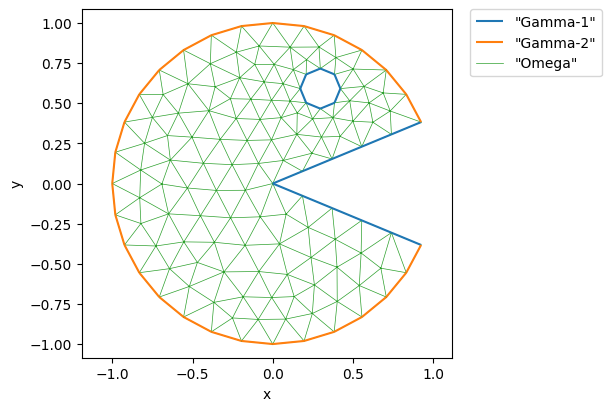

In [26]:
mesh = src.pacman(1.0, np.pi / 4, 0.2)
mesh.print_info()

fig, ax = plt.subplots(figsize=(6, 4), layout="constrained")
ax.axis("equal")
ax.set_xlabel("x")
ax.set_ylabel("y")

src.plot2d_mesh(ax, mesh)
plt.show()

<span style="color:red">__Question 3.4__</span> - Écrire la nouvelle formulation variationnelle du problème ($\mathcal{H}_m$).
On précisera l'espace fonctionnel qu'on pourra noter $V_m$.

<span style="color:green">__Réponse 3.4__</span> - On pose $V_m = \left\{ v \in H^1(\Omega) \mid v = 0 \text{ sur } \Gamma_D \right\}$ qui est le sous-espace de $H^1(\Omega)$ des fonctions qui s'annulent sur la partie de Dirichlet. Ce sera notre espace variationnel.

On multiplie l'équation par le conjugué complexe d'une fonction test $v \in V_m$ car $\beta$ peut être complexe et on intègre sur $\Omega$ :
$$
- \int_\Omega \Delta u\, \overline{v} \, d\Omega - \omega^2 \int_\Omega u \overline{v} \, d\Omega = 0
$$

En intégrant par parties le terme du Laplacien et en utilisant les conditions au bord, on a :
$$
- \int_\Omega \Delta u\, \overline{v} \, d\Omega
= \int_\Omega \nabla u \cdot \nabla \overline{v} \, d\Omega
- \int_{\partial\Omega} \partial_n u \, \overline{v} \, ds
$$

Sur $\Gamma_D$, $v = 0$ donc pas de contribution de bord.
Sur $\Gamma_F$, la condition de Fourier s'applique : $\partial_n u = -\beta u$. Donc :
$$
- \int_{\partial\Omega} \partial_n u \, \overline{v} \, ds
= - \int_{\Gamma_F} \partial_n u \, \overline{v} \, ds
= \int_{\Gamma_F} \beta u \overline{v} \, ds
$$

La formulation variationnelle devient donc :

> **Trouver $u \in V_m$ tel que, pour tout $v \in V_m$ :**
> $$
> \boxed{
> \int_\Omega \nabla u \cdot \nabla \overline{v} \, d\Omega
> - \omega^2 \int_\Omega u \overline{v} \, d\Omega
> + \int_{\Gamma_F} \beta u \overline{v} \, ds
> = 0
> }
> $$

où $\overline{v}$ désigne le conjugué complexe de $v$.

---

<span style="color:red">__Question 3.5__</span> - Expliquer précisément comment modifier votre code pour résoudre ($\mathcal{H}_m$) de manière à prendre en compte la condition aux limites de Dirichlet sur $\Gamma_D$ ?

<span style="color:green">__Réponse 3.5__</span> - Pour résoudre numériquement le problème aux limites mixtes ($\mathcal{H}_m$), il faut imposer la condition de Dirichlet homogène sur $\Gamma_D$ tout en traitant la condition de Fourier (ou Robin) sur $\Gamma_F$.

On écrit le système linéaire associé pour l'implémenter :$(\mathbb{K}' - \omega^2 \mathbb{M}' + \beta\,\mathbb{S}_F)\,\vec{U} = \vec{L}$
où :
- $\mathbb{K}'$, $\mathbb{M}'$ sont les matrices de rigidité et de masse modifiées pour prendre en compte les conditions de Dirichlet sur $\Gamma_D$ (i.e., pseudo-élimination sur $\Gamma_D$).
- $\mathbb{S}_F$ est la matrice de masse surfacique assemblée uniquement sur $\Gamma_F$.

Dans le code, on assemble les matrices globales puis on fait une pseudo-élimination sur $\Gamma_D$, ce qui modifie les matrices $\mathbb{K}$, $\mathbb{M}$, $\mathbb{S}_F$ :
- On remplace les lignes et colonnes correspondant aux nœuds de $\Gamma_D$ par des zéros,
- On place un $1$ sur la diagonale,
- On met à zéro les coordonnées correspondantes du second membre.

Cela force la solution à être nulle sur $\Gamma_D$.

Ensuite, on assemble le système modifié. On forme la matrice finale : $\mathbb{A} = \mathbb{K}' - \omega^2 \mathbb{M}' + \beta\,\mathbb{S}_F'$

Enfin, on résout le système $\mathbb{A} \vec{U} = \vec{L}$.

---

<span style="color:red">__Question 3.6__</span> - Testez votre code sur la géométrie Pacman.
Amusez-vous avec cette géométrie en faisant varier $\theta$ et en analysant les résultats obtenus.
Faire varier également $\beta$.
Vous pouvez aussi modifier les frontières sur lesquelles sont posées les C.L. : cela demande de modifier la fonction `_pacman`, ligne 7-101, dans `src/mesh_generator/pacman.py`.

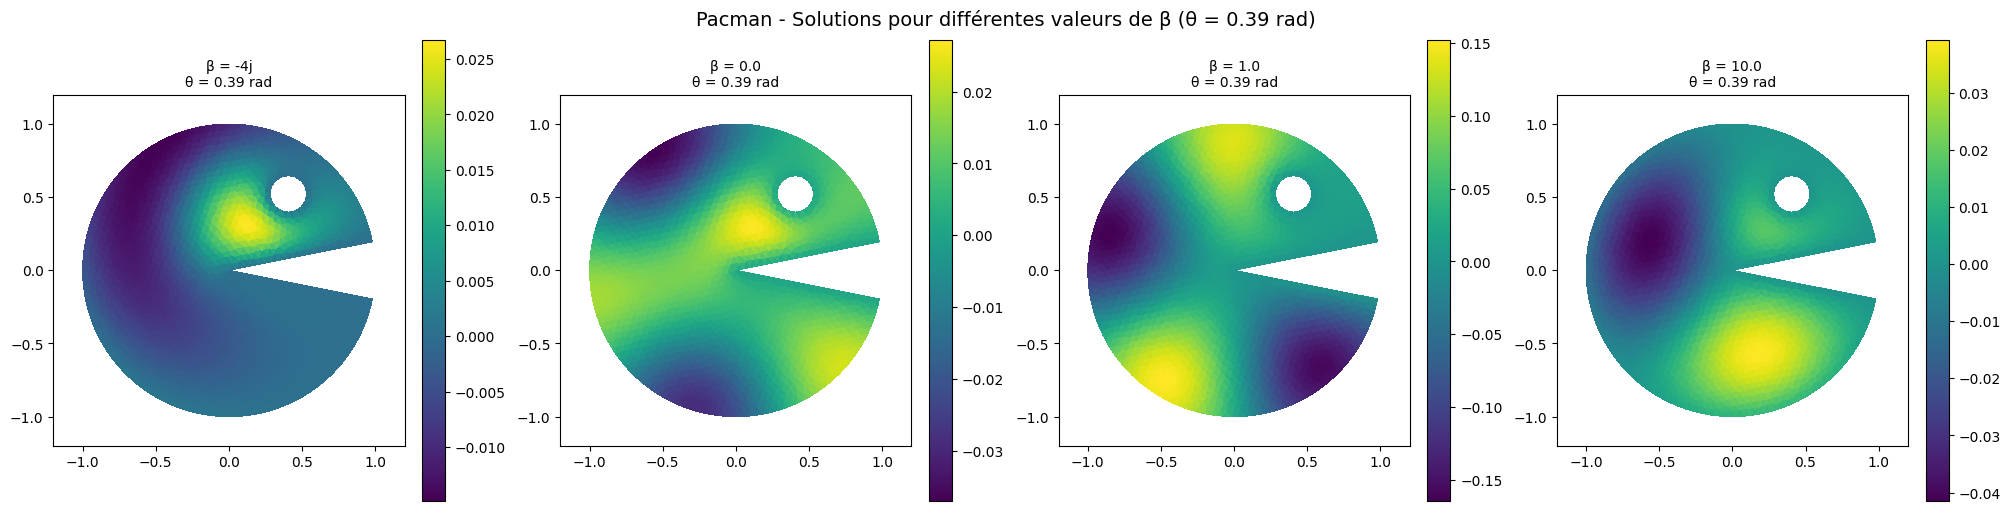

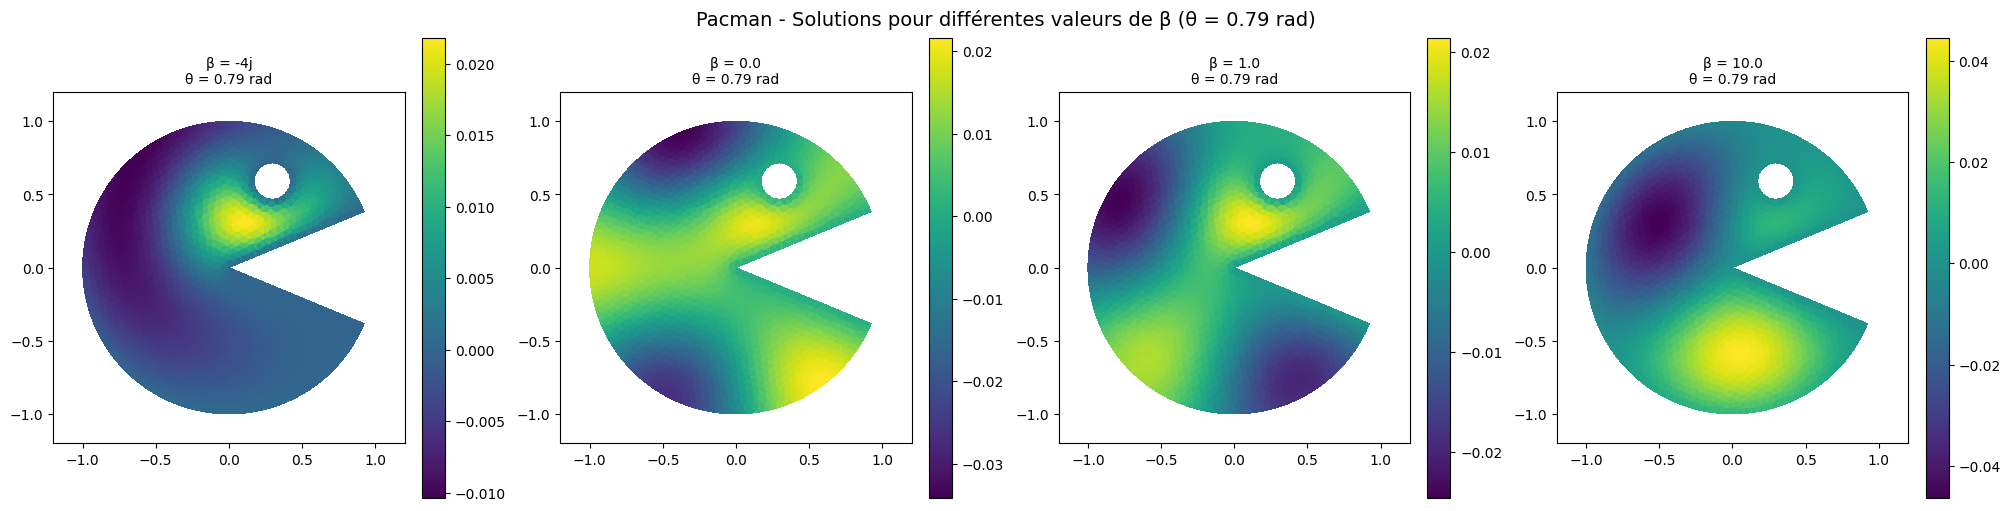

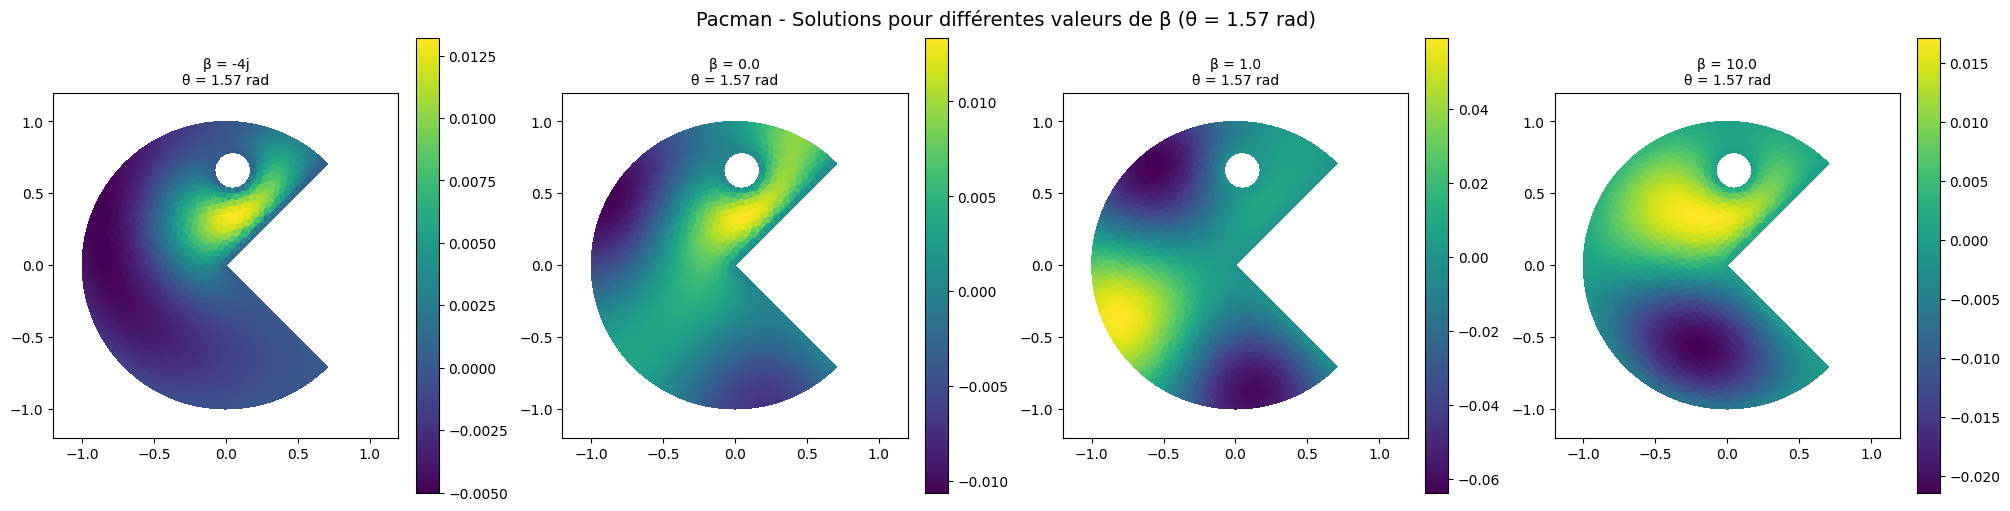

In [27]:
def reponse_3_6():
    omega = 4.0
    beta_values = [-1j * omega, 0.0, 1.0, 10.0]  
    theta_values = [np.pi / 8, np.pi / 4, np.pi / 2]

    for theta in theta_values:
        mesh = src.pacman(1.0, theta, 0.05)  #maillage pacman
        
        # définition de la source
        def source_pacman(nodes):
            x, y = nodes[:, 0], nodes[:, 1]
            return np.exp(-10*((x-0.3)**2 + (y-0.3)**2))  # Source gaussienne

        fig, axs = plt.subplots(1, len(beta_values), figsize=(20, 5), layout="constrained", subplot_kw={"aspect": "equal"})
        
        if len(beta_values) == 1:
            axs = [axs]  # Pour gérer le cas où il n'y a qu'un seul beta
        
        for i, (ax, beta) in enumerate(zip(axs, beta_values)):
            # Assemblage des matrices
            K, M = mat_KM(mesh, {"Omega": lambda _: 1.0})
            S_F = mat_S(mesh, "Gamma-2")  # Frontière Fourier (tête)
            L = vec_L(source_pacman, M, mesh.nodes)
            
            # Construction du système complet
            A_full = K - omega**2 * M + beta * S_F
            
            # Pseudo-élimination correcte sur Gamma_D
            dirichlet_nodes = mesh.domain_node_indices("Gamma-1", "line")
            
            # Conversion en format modifiable
            A = A_full.todok().copy()
            L_modified = L.copy()
            
            # Application de la pseudo-élimination
            for node in dirichlet_nodes:
                # Annuler la ligne et la colonne
                for j in range(A.shape[0]):
                    A[node, j] = 0
                    A[j, node] = 0
                # Mettre 1 sur la diagonale
                A[node, node] = 1
                # Annuler le second membre
                L_modified[node] = 0
            
            # Conversion back en format sparse efficace
            A = A.tocsc()
            
            try:
                # Résolution du système
                U_h = sp.linalg.spsolve(A, L_modified)
                
                # Affichage
                im = src.plot2d_fct_trimesh(
                    ax, np.real(U_h), mesh, show_colorbar=True
                )
                ax.set_title(f"β = {beta}\nθ = {theta:.2f} rad", fontsize=10)
                ax.set_xlim(-1.2, 1.2)
                ax.set_ylim(-1.2, 1.2)
                
            except Exception as e:
                print(f"Erreur pour β={beta}, θ={theta}: {e}")
                ax.text(0.5, 0.5, f"Erreur\nβ={beta}", ha='center', va='center', transform=ax.transAxes)
                ax.set_xlim(-1, 1)
                ax.set_ylim(-1, 1)

        plt.suptitle(f"Pacman - Solutions pour différentes valeurs de β (θ = {theta:.2f} rad)", fontsize=14)
        plt.show()

reponse_3_6()

<span style="color:green">__Commentaires 3.6__</span> - 

- **Influence de $\theta$ (ouverture de la bouche)**

  - **Petite ouverture ($\theta$ petit)** :  
    La majorité du bord est en condition de type Fourier.  
    
    La solution ressemble à celle d’un disque presque complet, l'onde reste plus confinée dans le pacman.
  - **Grande ouverture ($\theta$ grand)** :  
    La zone de type Fourier est plus petite, le domaine "Pacman" est plus ouvert.  
    
    Il y a moins de résonance, la solution peut s'échapper plus facilement.

- **Effet du paramètre $\beta$**

  - **$\beta = -i\omega$** :  
    L’onde disparaît rapidement à la frontière, il y a peu de réflexions.

  - **$\beta = 0$** :  
    C'est sous cette condition que l'on remarque le plus de réflexions.
  - **$\beta > 0$** :  
    On remarque aussi des réfexions mais plus faibles que pour $\beta = 0$.


<span style="color:red">__Question 3.7__</span> - Pour ce problème, nous ne disposons pas de la solution exacte.
Comment proposeriez-vous de tester la convergence ? comment construire une solution de référence ?
Appliquez votre méthode pour tester la convergence de votre code.

_Indication : il existe une fonction `src.projection_nested(U_fine, mesh_fine, mesh_coarse)` qui « projette » une solution `U_fine` définie sur le maillage `mesh_fine` sur un sous maillage `mesh_coarse`._

Calcul des solutions sur différents maillages...
  Maillage 1/4 - h = 0.2
    Norme H1 = 5.523180e-03, Norme L2 = 1.636856e-02
  Maillage 2/4 - h = 0.1
    Norme H1 = 6.500074e-03, Norme L2 = 1.776919e-02
  Maillage 3/4 - h = 0.05
    Norme H1 = 6.928738e-03, Norme L2 = 1.828604e-02
  Maillage 4/4 - h = 0.025
    Norme H1 = 7.088080e-03, Norme L2 = 1.849619e-02
Erreur relative h_0(0.2) -> h_1(0.1):
  Norme H1: 1.768717e-01
  Norme L2: 8.556812e-02
Erreur relative h_1(0.1) -> h_2(0.05):
  Norme H1: 6.594760e-02
  Norme L2: 2.908740e-02
Erreur relative h_2(0.05) -> h_3(0.025):
  Norme H1: 2.299715e-02
  Norme L2: 1.149210e-02


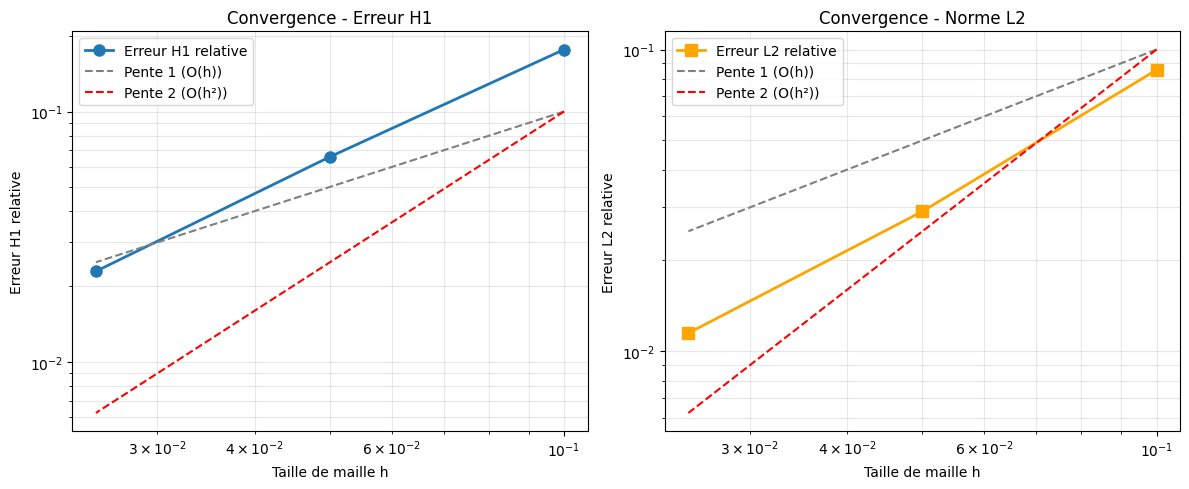


Pentes de convergence estimées:
  Semi-norme H1: 1.47 (attendu: ~1 pour P1)
  Norme L2: 1.45 (attendu: ~2 pour P1)


In [28]:
def reponse_3_7():
    omega = 4.0
    beta = 1.0
    theta = np.pi / 4

    # Plusieurs niveaux de raffinement pour étudier la convergence
    mesh_sizes = [0.2, 0.1, 0.05, 0.025]  # 4 niveaux pour avoir 3 points de convergence
    energy_values = []
    l2_norm_values = []
    
    # Source pour le test
    def source_pacman(nodes):
        x, y = nodes[:, 0], nodes[:, 1]
        return np.exp(-10 * ((x - 0.3) ** 2 + (y - 0.3) ** 2))

    print("Calcul des solutions sur différents maillages...")
    
    for i, h in enumerate(mesh_sizes):
        print(f"  Maillage {i+1}/4 - h = {h}")
        mesh = src.pacman(1.0, theta, h)
        
        # Résolution sur le maillage courant
        K, M = mat_KM(mesh, {"Omega": lambda _: 1.0})
        S_F = mat_S(mesh, "Gamma-2")
        L = vec_L(source_pacman, M, mesh.nodes)

        A_full = K - omega**2 * M + beta * S_F
        dirichlet_nodes = mesh.domain_node_indices("Gamma-1", "line")
        A = A_full.todok().copy()
        L_modified = L.copy()

        for node in dirichlet_nodes:
            for j in range(A.shape[0]):
                A[node, j] = 0
                A[j, node] = 0
            A[node, node] = 1
            L_modified[node] = 0

        A = A.tocsc()
        U_h = sp.linalg.spsolve(A, L_modified)
        
        # Calcul des quantités d'intérêt
        energy = U_h @ (K @ U_h)  # Énergie
        l2_norm = np.sqrt(U_h @ (M @ U_h))  # Norme L2 approximative
        
        energy_values.append(energy)
        l2_norm_values.append(l2_norm)
        
        print(f"    Norme H1 = {energy:.6e}, Norme L2 = {l2_norm:.6e}")

    # Calcul des erreurs relatives entre maillages successifs
    energy_errors = []
    l2_errors = []
    
    for i in range(len(mesh_sizes) - 1):
        energy_error = abs(energy_values[i+1] - energy_values[i]) / abs(energy_values[i])
        l2_error = abs(l2_norm_values[i+1] - l2_norm_values[i]) / abs(l2_norm_values[i])
        
        energy_errors.append(energy_error)
        l2_errors.append(l2_error)
        
        print(f"Erreur relative h_{i}({mesh_sizes[i]}) -> h_{i+1}({mesh_sizes[i+1]}):")
        print(f"  Norme H1: {energy_error:.6e}")
        print(f"  Norme L2: {l2_error:.6e}")

    # Tracé des résultats de convergence
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Courbe pour l'énergie
    ax1.loglog(mesh_sizes[1:], energy_errors, 'o-', label="Erreur H1 relative", linewidth=2, markersize=8)
    ax1.set_xlabel('Taille de maille h')
    ax1.set_ylabel('Erreur H1 relative')
    ax1.set_title('Convergence - Erreur H1')
    ax1.grid(True, which="both", ls="-", alpha=0.3)
    ax1.legend()
    
    # Ajout des pentes théoriques
    x_ref = np.array([mesh_sizes[1], mesh_sizes[-1]])
    y_ref_1 = 0.1 * (x_ref / x_ref[0])  # Pente 1
    y_ref_2 = 0.1 * (x_ref / x_ref[0])**2  # Pente 2
    ax1.loglog(x_ref, y_ref_1, '--', color='gray', label='Pente 1 (O(h))')
    ax1.loglog(x_ref, y_ref_2, '--', color='red', label='Pente 2 (O(h²))')
    ax1.legend()
    
    # Courbe pour la norme L2
    ax2.loglog(mesh_sizes[1:], l2_errors, 's-', label="Erreur L2 relative", linewidth=2, markersize=8, color='orange')
    ax2.set_xlabel('Taille de maille h')
    ax2.set_ylabel('Erreur L2 relative')
    ax2.set_title('Convergence - Norme L2')
    ax2.grid(True, which="both", ls="-", alpha=0.3)
    ax2.legend()
    
    # Ajout des pentes théoriques
    ax2.loglog(x_ref, y_ref_1, '--', color='gray', label='Pente 1 (O(h))')
    ax2.loglog(x_ref, y_ref_2, '--', color='red', label='Pente 2 (O(h²))')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Analyse de la pente de convergence
    if len(energy_errors) >= 2:
        # Calcul de la pente moyenne pour l'énergie
        log_h = np.log(mesh_sizes[1:])
        log_energy_error = np.log(energy_errors)
        slope_energy = (log_energy_error[-1] - log_energy_error[0]) / (log_h[-1] - log_h[0])
        
        # Calcul de la pente moyenne pour L2
        log_l2_error = np.log(l2_errors)
        slope_l2 = (log_l2_error[-1] - log_l2_error[0]) / (log_h[-1] - log_h[0])
        
        print(f"\nPentes de convergence estimées:")
        print(f"  Semi-norme H1: {slope_energy:.2f} (attendu: ~1 pour P1)")
        print(f"  Norme L2: {slope_l2:.2f} (attendu: ~2 pour P1)")

reponse_3_7()

## Commentaire des résultats

- La convergence observée ne suit pas exactement les ordres théoriques attendus : 
- **Norme H¹** : pente ~ 1 → convergence O(h) 
- **Norme L2** : pente ~ 2 → convergence O(h²) 

**Conclusion :** Malheureusement ces erreurs ne nous permettent pas de valider notre résolution éléments finis P1 du problème de Helmholtz avec conditions mixtes.

<span style="color:red">__Question 3.8__</span> - Comment pourriez-vous procéder pour traiter un problème avec 3 types de C.L. : Dirichlet non homogène, Fourier et Neumann non homogène ?
Expliquez comment il faudrait modifier le code ?

<span style="color:green">__Réponse 3.8__</span> - 

On considère un problème de type Helmholtz (ou Poisson) avec :
- **Dirichlet non homogène** sur $\Gamma_D$ : $u = g_D$,
- **Fourier (Robin)** sur $\Gamma_F$ : $\partial_n u + \beta u = g_F$,
- **Neumann non homogène** sur $\Gamma_N$ : $\partial_n u = g_N$.

La formulation variationnelle s’écrit, pour tout $v$ dans l’espace $V = \{ v \in H^1(\Omega) : v = 0 \text{ sur } \Gamma_D \}$ :
$$
  \int_\Omega \mu \nabla u \cdot \nabla \overline{v}\, d\Omega
  - \omega^2 \int_\Omega u\, \overline{v}\, d\Omega
  + \int_{\Gamma_F} \beta u\, \overline{v}\, ds
  = \int_\Omega f\, \overline{v}\, d\Omega
  + \int_{\Gamma_N} g_N\, \overline{v}\, ds
  + \int_{\Gamma_F} g_F\, \overline{v}\, ds
$$

Dans le code, il faudrait imposer la Dirichlet non homogène en mettant à jour la solution globale pour que $u = g_D$ sur $\Gamma_D$. Puis lors du montage du système, appliquer la pseudo-élimination sur les nœuds de $\Gamma_D$ et remplir le second membre en conséquence : pour chaque nœud sur $\Gamma_D$, mettre la valeur imposée $g_D$.

Il faut prendre en compte le terme source sur le bord
assembler la contribution $g_N$ sur $\Gamma_N$ et la contribution $g_F$ sur $\Gamma_F$ dans le second membre/

Pour l'assemblage, les matrices de rigidité, masse, et surfacique Fourier sont assemblées comme d’habitude et le second membre reçoit les contributions volumiques (source $f$), les contributions de bord (Neumann et Fourier non homogènes, comme ci-dessus), et les corrections liées à la Dirichlet non homogène ($g_D$).

Après pseudo-élimination et montage du second membre modifié, reste à résoudre le système.
